# Import and Install Library

In [ ]:
# !pip uninstall -y numpy scipy seaborn pandas
# !pip cache purge

# !pip install \
# numpy==1.26.4 \
# scipy==1.11.4 \
# pandas==2.2.3 \
# seaborn==0.13.2 \
# matplotlib==3.8.4

In [ ]:
!pip install -U scikit-learn --quiet

In [1]:
!pip install scikit-learn==1.4.2 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 99.0 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.8.0
    Uninstalling scikit-learn-1.8.0:
      Successfully uninstalled scikit-learn-1.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.9.0 requires scikit-learn>=1.6.0, but you have scikit-learn 1.4.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.
fastai 2.8.4 requires fastcore<1.9,>=1.8.0, but you have fastcore 1.11.3 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.


In [2]:
import numpy as np
import scipy
import sklearn

print(np.__version__)
print(scipy.__version__)
print(sklearn.__version__)

2.0.2
1.15.3
1.4.2


In [3]:
# Cleanup to ensure no residual files remain

!pip uninstall -y transformers accelerate peft bitsandbytes sentence-transformers
!rm -rf /usr/local/lib/python3.11/dist-packages/transformers*
!rm -rf /usr/local/lib/python3.11/dist-packages/peft*
!rm -rf /usr/local/lib/python3.11/dist-packages/accelerate*
!rm -rf /usr/local/lib/python3.11/dist-packages/bitsandbytes*

Found existing installation: transformers 4.57.1
Uninstalling transformers-4.57.1:
  Successfully uninstalled transformers-4.57.1
Found existing installation: accelerate 1.11.0
Uninstalling accelerate-1.11.0:
  Successfully uninstalled accelerate-1.11.0
Found existing installation: peft 0.17.1
Uninstalling peft-0.17.1:
  Successfully uninstalled peft-0.17.1
Found existing installation: sentence-transformers 5.1.1
Uninstalling sentence-transformers-5.1.1:
  Successfully uninstalled sentence-transformers-5.1.1


In [4]:
# Install The Library

!pip install -q \
    "transformers==4.38.2" \
    "peft==0.9.0" \
    "accelerate==0.28.0" \
    "scikit-learn==1.4.2" \
    "datasets==2.18.0" \
    "evaluate" \
    "matplotlib" \
    "seaborn" \
    "sentence-transformers"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 73.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.7/146.7 kB 13.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Thi

In [5]:
# Import Library
import os
import gc
import time
import pandas as pd
import numpy as np
import torch
import torch.nn as nn  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix
)

from sklearn.utils.class_weight import compute_class_weight

import transformers
from transformers import (
    AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments,
    Trainer, BitsAndBytesConfig, set_seed, EarlyStoppingCallback
)

from peft import get_peft_model, LoraConfig, PrefixTuningConfig, TaskType 
from datasets import Dataset, DatasetDict
import evaluate

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA tidak tersedia")

2026-01-27 06:27:08.141701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769495228.333284     150 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769495228.390497     150 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769495228.864479     150 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769495228.864511     150 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769495228.864514     150 computation_placer.cc:177] computation placer alr

GPU: Tesla T4


In [6]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [7]:
!nvidia-smi

Tue Jan 27 06:28:35 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.172.08             Driver Version: 570.172.08     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8             10W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Function & Configuration

In [8]:
# Configuration
class BaseConfig:
    TARGET_COLUMN = 'Emotion'
    DATASETS = ["raw", "norm"] 
    SEEDS = [42, 2023, 7]
    MAX_LENGTH = 64
    BATCH_SIZE = 16
    EPOCHS = 4
    OUTPUT_DIR = "/kaggle/working/models"

CONFIG = BaseConfig()

In [9]:
# Load Data Function
def load_presplit_data(dataset_type, label_column):
    """
    Load pre-split train/val/test from new folder structure
    No splitting needed - data already divided
    
    Args:
        dataset_type: "raw" or "norm"
        label_column: name of label column (e.g., "Emotion")
    
    Returns:
        train_df, val_df, test_df, id2label, label2id, text_column
    """
    BASE_PATH = "/kaggle/input/split-raw-norm"
    
    DATASET_CONFIGS = {
        "raw": {
            "train": f"{BASE_PATH}/split/raw/train_raw.csv",
            "val": f"{BASE_PATH}/split/raw/val_raw.csv",
            "test": f"{BASE_PATH}/split/raw/test_raw.csv",
            "text_column": "text"
        },
        "norm": {
            "train": f"{BASE_PATH}/split/norm/train_norm.csv",
            "val": f"{BASE_PATH}/split/norm/val_norm.csv",
            "test": f"{BASE_PATH}/split/norm/test_norm.csv",
            "text_column": "text"
        }
    }
    
    config = DATASET_CONFIGS[dataset_type]
    text_column = config["text_column"]
    
    print(f"\nData: {dataset_type}")
    train_df = pd.read_csv(config["train"])
    val_df = pd.read_csv(config["val"])
    test_df = pd.read_csv(config["test"])
    
    # Clean missing values
    train_df.dropna(subset=[text_column, label_column], inplace=True)
    val_df.dropna(subset=[text_column, label_column], inplace=True)
    test_df.dropna(subset=[text_column, label_column], inplace=True)
    
    train_df = train_df.reset_index(drop=True)
    val_df = val_df.reset_index(drop=True)
    test_df = test_df.reset_index(drop=True)
    
    # Create label mappings from training set
    labels = sorted(train_df[label_column].unique().tolist())
    label2id = {label: i for i, label in enumerate(labels)}
    id2label = {i: label for i, label in enumerate(labels)}
    
    # Map labels
    train_df['labels'] = train_df[label_column].map(label2id)
    val_df['labels'] = val_df[label_column].map(label2id)
    test_df['labels'] = test_df[label_column].map(label2id)
    
    print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")
    
    return train_df, val_df, test_df, id2label, label2id, text_column

In [10]:
# Convertion to Hugging Face Dataset Function
def convert_to_hf_dataset(train_df, val_df, test_df):
    return DatasetDict({
        'train': Dataset.from_pandas(train_df),
        'validation': Dataset.from_pandas(val_df),
        'test': Dataset.from_pandas(test_df)
    })

In [11]:
# Custom Trainer for Class Weights
class WeightedTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        
        # Loss function dengan weight untuk menangani imbalance
        loss_fct = torch.nn.CrossEntropyLoss(weight=self.class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [12]:
# Training & Evaluation Transformer (FT, LoRA, QLoRA, Prefix) Function
def train_and_evaluate_transformer(dataset, text_col, model_name, peft_method, id2label, label2id, seed):
    print(f"\n----- Training: {model_name} | Method: {peft_method} | Seed: {seed} -----")
    set_seed(seed)
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    if tokenizer.pad_token is None: 
        tokenizer.pad_token = tokenizer.eos_token

    def tokenize_function(examples):
        return tokenizer(
            examples[text_col],
            padding="max_length",
            truncation=True,
            max_length=CONFIG.MAX_LENGTH
        )
    
    tokenized_datasets = dataset.map(tokenize_function, batched=True)

    y_train = tokenized_datasets["train"]["labels"]
    weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights = torch.tensor(weights, dtype=torch.float).to("cuda")

    bnb_config = None
    if peft_method == "qlora":
        bnb_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16
        )

    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(id2label),
        id2label=id2label,
        label2id=label2id,
        quantization_config=bnb_config,
        device_map="auto" if peft_method == "qlora" else None
    )
    
    if peft_method != "qlora": 
        model.to("cuda")
    model.config.pad_token_id = tokenizer.pad_token_id

    if peft_method == "prefix_tuning":
        epochs = 10
    else:
        epochs = CONFIG.EPOCHS

    if peft_method in ["lora", "qlora"]:
        peft_config = LoraConfig(
            r=8,
            lora_alpha=16,
            lora_dropout=0.1,
            bias="none",
            task_type=TaskType.SEQ_CLS
        )
        model = get_peft_model(model, peft_config)
        lr = 1e-4

    elif peft_method == "full_ft":
        lr = 2e-5

    else:
        lr = 1e-3

    
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Trainable params: {trainable_params:,} || Trainable %: {100 * trainable_params / total_params:.4f}")

    output_path = os.path.join(CONFIG.OUTPUT_DIR, f"{model_name.split('/')[-1]}-{peft_method}-{seed}")

    def compute_metrics_trainer(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return {
            "accuracy": accuracy_score(labels, predictions),
            "f1-macro": f1_score(labels, predictions, average="macro")
        }

    training_args = TrainingArguments(
        output_dir=output_path,
        num_train_epochs=epochs,  
        overwrite_output_dir=True, 
        per_device_train_batch_size=CONFIG.BATCH_SIZE,
        per_device_eval_batch_size=CONFIG.BATCH_SIZE,
        learning_rate=lr,
        weight_decay=0.01,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="f1-macro",
        greater_is_better=True,
        fp16=True,
        report_to="none",
        resume_from_checkpoint = False
    )

    trainer = WeightedTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
        compute_metrics=compute_metrics_trainer,
        class_weights=class_weights,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )

    torch.cuda.reset_peak_memory_stats()
    start_time = time.time()
    trainer.train(resume_from_checkpoint=False)
    total_train_time = time.time() - start_time
    peak_gpu_memory_mb = torch.cuda.max_memory_allocated() / (1024**2)

    test_predictions = trainer.predict(tokenized_datasets["test"])
    y_true = test_predictions.label_ids
    y_pred = np.argmax(test_predictions.predictions, axis=-1)

    class_names = list(label2id.keys())
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    final_results = {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1-macro": f1_score(y_true, y_pred, average="macro"),
        "precision-macro": precision_score(y_true, y_pred, average="macro"),
        "recall-macro": recall_score(y_true, y_pred, average="macro"),
        "total_train_time": total_train_time,
        "peak_gpu_memory_mb": peak_gpu_memory_mb,
        "num_trainable_params": trainable_params
    }

    del model, trainer
    gc.collect()
    torch.cuda.empty_cache()

    return final_results

# A. TF-IDF + Logistic Regression

In [13]:
def train_and_evaluate_baseline(train_df, test_df, text_col, label_col_str, id2label, seed):
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.pipeline import Pipeline
      
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(random_state=seed, max_iter=1000, solver='liblinear'))
    ])
    
    start_time = time.time()
    pipeline.fit(train_df[text_col], train_df[label_col_str])
    total_train_time = time.time() - start_time
    
    y_true = test_df[label_col_str]
    y_pred = pipeline.predict(test_df[text_col])
    
    print("\nClassification Report - TF-IDF + Logistic Regression")
    class_names = list(id2label.values())
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix - TF-IDF + Logistic Regression'); plt.show()
    
    results = {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1-macro": f1_score(y_true, y_pred, average='macro'),
        "precision-macro": precision_score(y_true, y_pred, average='macro'),
        "recall-macro": recall_score(y_true, y_pred, average='macro'),
        "total_train_time": total_train_time,
        "peak_gpu_memory_mb": 0,
        "num_trainable_params": pipeline.named_steps['clf'].coef_.size,
        "adapter_size_mb": 0
    }
    return results


Data: raw
Train: 4320, Val: 540, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.52      0.33      0.40        70
        Fear       0.40      0.39      0.40        92
       Happy       0.71      0.89      0.79       177
        Love       0.71      0.40      0.51        81
     Sadness       0.56      0.65      0.60       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.54       540
weighted avg       0.60      0.60      0.59       540



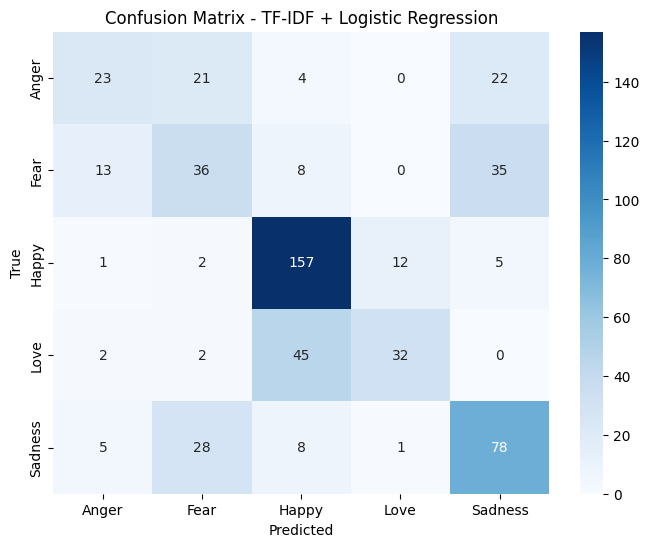


Data: raw
Train: 4320, Val: 540, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.52      0.33      0.40        70
        Fear       0.40      0.39      0.40        92
       Happy       0.71      0.89      0.79       177
        Love       0.71      0.40      0.51        81
     Sadness       0.56      0.65      0.60       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.54       540
weighted avg       0.60      0.60      0.59       540



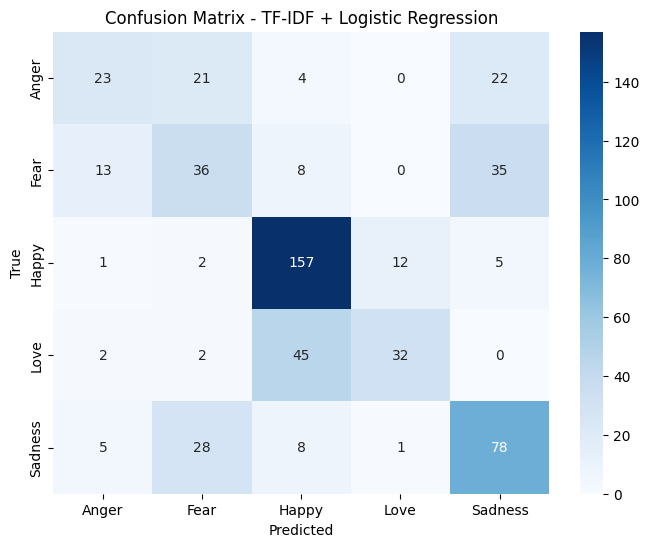


Data: raw
Train: 4320, Val: 540, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.52      0.33      0.40        70
        Fear       0.40      0.39      0.40        92
       Happy       0.71      0.89      0.79       177
        Love       0.71      0.40      0.51        81
     Sadness       0.56      0.65      0.60       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.54       540
weighted avg       0.60      0.60      0.59       540



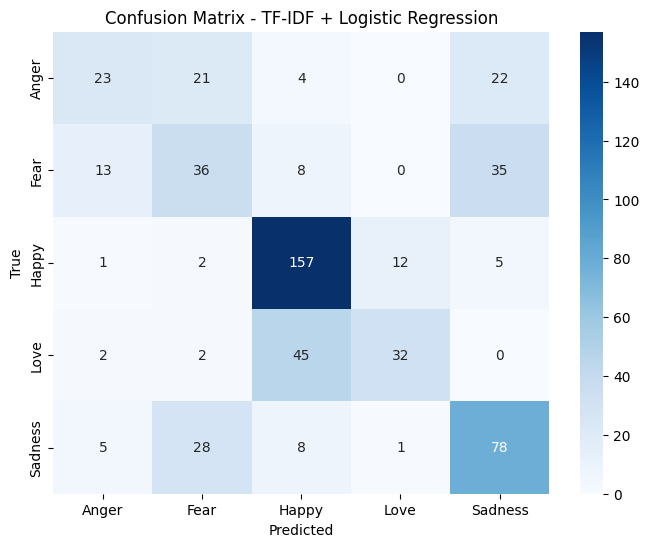


Data: norm
Train: 4314, Val: 539, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.62      0.30      0.40        70
        Fear       0.44      0.43      0.44        92
       Happy       0.70      0.86      0.77       177
        Love       0.60      0.35      0.44        81
     Sadness       0.55      0.68      0.61       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.53       540
weighted avg       0.60      0.60      0.58       540



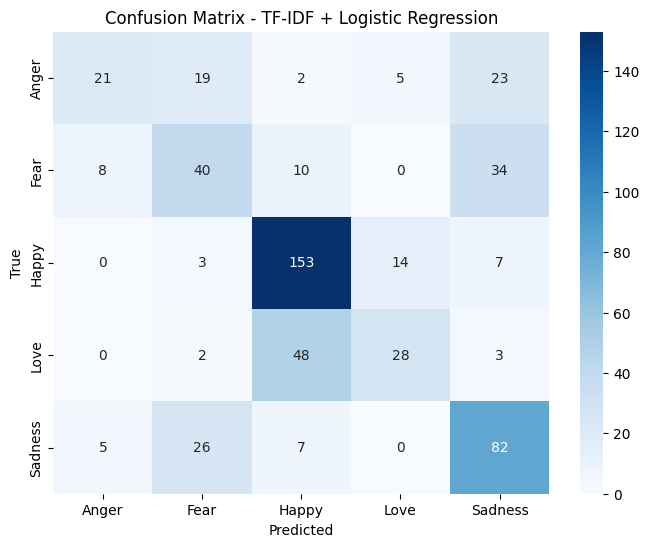


Data: norm
Train: 4314, Val: 539, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.62      0.30      0.40        70
        Fear       0.44      0.43      0.44        92
       Happy       0.70      0.86      0.77       177
        Love       0.60      0.35      0.44        81
     Sadness       0.55      0.68      0.61       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.53       540
weighted avg       0.60      0.60      0.58       540



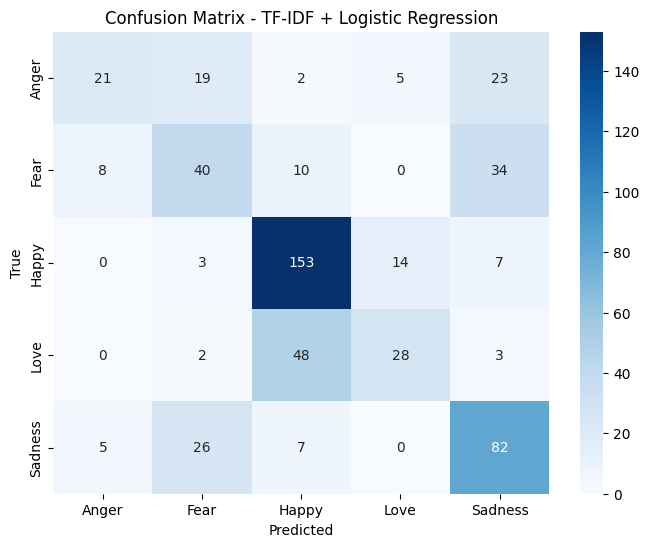


Data: norm
Train: 4314, Val: 539, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.62      0.30      0.40        70
        Fear       0.44      0.43      0.44        92
       Happy       0.70      0.86      0.77       177
        Love       0.60      0.35      0.44        81
     Sadness       0.55      0.68      0.61       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.53       540
weighted avg       0.60      0.60      0.58       540



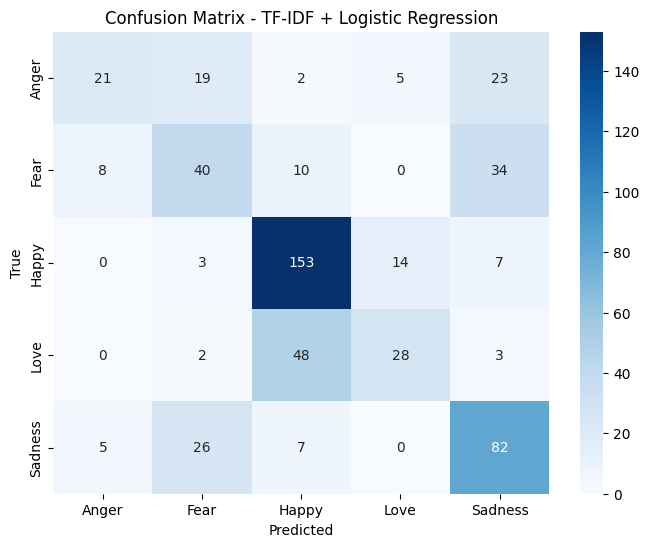

In [14]:
all_results_A = []

for dataset_name in CONFIG.DATASETS:
    for seed in CONFIG.SEEDS:
        try:
            # Load pre-split data
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
                dataset_name, CONFIG.TARGET_COLUMN
            )
            
            # Combine train + val for baseline (no validation needed)
            full_train_df = pd.concat([train_df, val_df])
            
            results = train_and_evaluate_baseline(
                full_train_df, test_df, text_col, CONFIG.TARGET_COLUMN, id2label, seed
            )
            
            run_info = {"dataset": dataset_name, "model": "TF-IDF + LogReg", "seed": seed}
            run_info.update(results)
            all_results_A.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue

In [15]:
# Final Result for TF-IDF + Logistic Regression
if all_results_A:
    results_df_A = pd.DataFrame(all_results_A)
    print("Final Result for TF-IDF + Logistic Regression")
    display(results_df_A)

Final Result for TF-IDF + Logistic Regression


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params,adapter_size_mb
0,raw,TF-IDF + LogReg,42,0.603704,0.539241,0.580537,0.530389,0.161469,0,41965,0
1,raw,TF-IDF + LogReg,2023,0.603704,0.539241,0.580537,0.530389,0.552945,0,41965,0
2,raw,TF-IDF + LogReg,7,0.603704,0.539241,0.580537,0.530389,0.150471,0,41965,0
3,norm,TF-IDF + LogReg,42,0.600000,0.532271,0.580725,0.525640,0.142678,0,41850,0
4,norm,TF-IDF + LogReg,2023,0.600000,0.532271,0.580725,0.525640,0.147023,0,41850,0
5,norm,TF-IDF + LogReg,7,0.600000,0.532271,0.580725,0.525640,0.145641,0,41850,0


# A2. Rapids GPU-Accelerated TF-IDF + Logistic Regression

In [16]:
# Install Rapids

!pip install --extra-index-url=https://pypi.nvidia.com cuml-cu12 cudf-cu12

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 51.7 MB/s eta 0:00:00:00:0100:01
Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (8.9 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 22.0.0
    Uninstalling pyarrow-22.0.0:
      Successfully uninstalled pyarrow-22.0.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.22.1 requires google-cloud-bigquery-storage>=2.0.0, which is not installed.
bigframes 2.26.0 requires goog

In [17]:
def train_and_evaluate_baseline_gpu(train_df, test_df, text_col, label_col_str, id2label, seed):
    """
    GPU-accelerated version using Rapids cuML
    Falls back to CPU if Rapids not available
    """
    try:
        import cudf
        from cuml.linear_model import LogisticRegression as cuLogisticRegression
        from cuml.feature_extraction.text import TfidfVectorizer as cuTfidfVectorizer
        
        print("\n--- Training TF-IDF + Logistic Regression (GPU-Accelerated) ---")
        
        # Transfer to GPU
        train_gpu = cudf.DataFrame({
            'text': train_df[text_col].values,
            'label': train_df[label_col_str].values
        })
        test_gpu = cudf.DataFrame({
            'text': test_df[text_col].values,
            'label': test_df[label_col_str].values
        })
        
        # TF-IDF on GPU
        tfidf = cuTfidfVectorizer(max_features=5000)
        
        start_time = time.time()
        X_train = tfidf.fit_transform(train_gpu['text'])
        X_test = tfidf.transform(test_gpu['text'])
        
        # LogReg on GPU
        clf = cuLogisticRegression(max_iter=1000, solver='qn')
        clf.fit(X_train, train_gpu['label'])
        
        total_train_time = time.time() - start_time
        
        # Predict and transfer back to CPU
        y_pred_gpu = clf.predict(X_test)
        y_pred = y_pred_gpu.to_numpy() if hasattr(y_pred_gpu, 'to_numpy') else y_pred_gpu
        y_true = test_gpu['label'].to_numpy()
        
        # Estimate GPU memory (rough)
        import cupy as cp
        gpu_memory_mb = (cp.cuda.Device().mem_info[1] - cp.cuda.Device().mem_info[0]) / (1024**2)
        
        print(f"GPU Training Time: {total_train_time:.2f}s")
        
    except ImportError:
        print("Rapids not available, falling back to CPU version")
        return train_and_evaluate_baseline(train_df, test_df, text_col, label_col_str, id2label, seed)
    
    except Exception as e:
        print(f"GPU version failed ({e}), falling back to CPU")
        return train_and_evaluate_baseline(train_df, test_df, text_col, label_col_str, id2label, seed)
    
    # Metrics (same as CPU version)
    print("\nClassification Report")
    class_names = list(id2label.values())
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix - TF-IDF (GPU)'); plt.show()
    
    results = {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1-macro": f1_score(y_true, y_pred, average='macro'),
        "precision-macro": precision_score(y_true, y_pred, average='macro'),
        "recall-macro": recall_score(y_true, y_pred, average='macro'),
        "total_train_time": total_train_time,
        "peak_gpu_memory_mb": gpu_memory_mb,
        "num_trainable_params": 5000 * len(id2label),  # TF-IDF features * classes
        "adapter_size_mb": 0
    }
    return results


Data: raw
Train: 4320, Val: 540, Test: 540


<frozen importlib._bootstrap>:488: RuntimeWarning: pyarrow.lib.IpcReadOptions size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject


GPU version failed (module 'pyarrow.lib' has no attribute 'PyExtensionType'), falling back to CPU

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.52      0.33      0.40        70
        Fear       0.40      0.39      0.40        92
       Happy       0.71      0.89      0.79       177
        Love       0.71      0.40      0.51        81
     Sadness       0.56      0.65      0.60       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.54       540
weighted avg       0.60      0.60      0.59       540



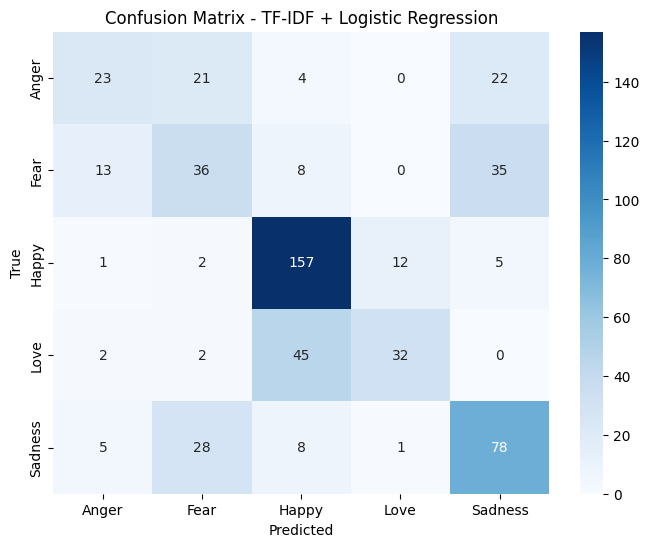


Data: raw
Train: 4320, Val: 540, Test: 540
GPU version failed (module 'pyarrow.lib' has no attribute 'PyExtensionType'), falling back to CPU

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.52      0.33      0.40        70
        Fear       0.40      0.39      0.40        92
       Happy       0.71      0.89      0.79       177
        Love       0.71      0.40      0.51        81
     Sadness       0.56      0.65      0.60       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.54       540
weighted avg       0.60      0.60      0.59       540



<frozen importlib._bootstrap>:488: RuntimeWarning: pyarrow.lib.IpcReadOptions size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject


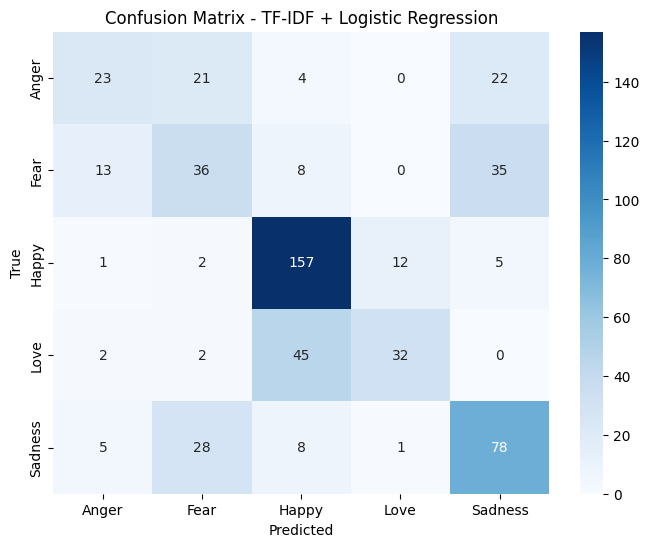


Data: raw
Train: 4320, Val: 540, Test: 540
GPU version failed (module 'pyarrow.lib' has no attribute 'PyExtensionType'), falling back to CPU

Classification Report - TF-IDF + Logistic Regression


<frozen importlib._bootstrap>:488: RuntimeWarning: pyarrow.lib.IpcReadOptions size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject


              precision    recall  f1-score   support

       Anger       0.52      0.33      0.40        70
        Fear       0.40      0.39      0.40        92
       Happy       0.71      0.89      0.79       177
        Love       0.71      0.40      0.51        81
     Sadness       0.56      0.65      0.60       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.54       540
weighted avg       0.60      0.60      0.59       540



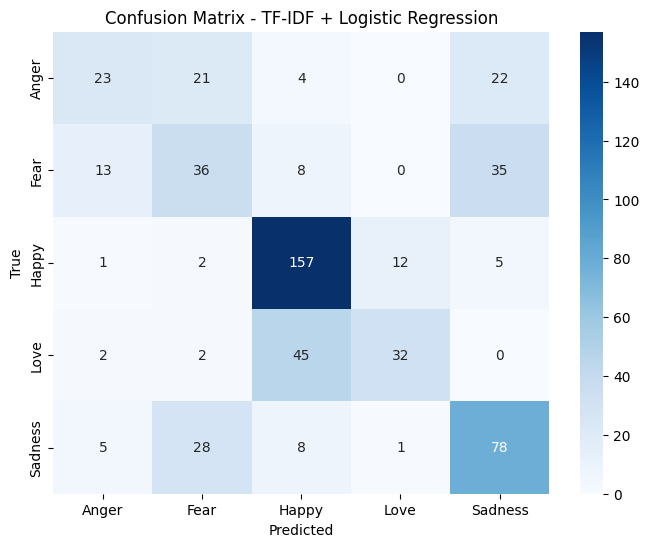


Data: norm
Train: 4314, Val: 539, Test: 540
GPU version failed (module 'pyarrow.lib' has no attribute 'PyExtensionType'), falling back to CPU

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.62      0.30      0.40        70
        Fear       0.44      0.43      0.44        92
       Happy       0.70      0.86      0.77       177
        Love       0.60      0.35      0.44        81
     Sadness       0.55      0.68      0.61       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.53       540
weighted avg       0.60      0.60      0.58       540



<frozen importlib._bootstrap>:488: RuntimeWarning: pyarrow.lib.IpcReadOptions size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject


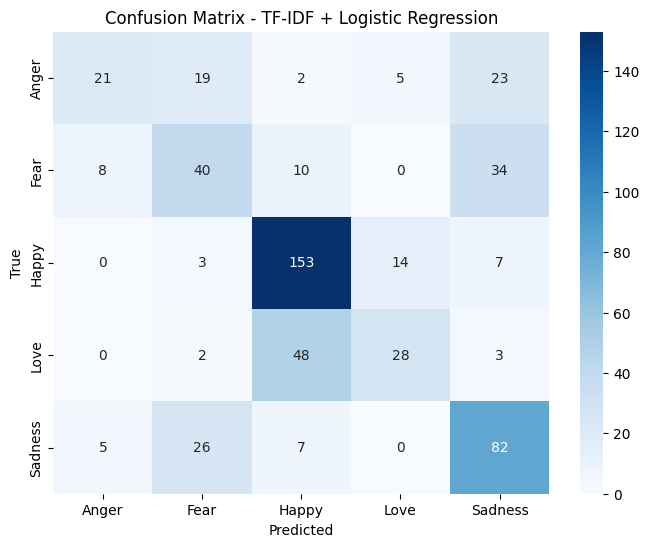


Data: norm
Train: 4314, Val: 539, Test: 540
GPU version failed (module 'pyarrow.lib' has no attribute 'PyExtensionType'), falling back to CPU

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.62      0.30      0.40        70
        Fear       0.44      0.43      0.44        92
       Happy       0.70      0.86      0.77       177
        Love       0.60      0.35      0.44        81
     Sadness       0.55      0.68      0.61       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.53       540
weighted avg       0.60      0.60      0.58       540



<frozen importlib._bootstrap>:488: RuntimeWarning: pyarrow.lib.IpcReadOptions size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject


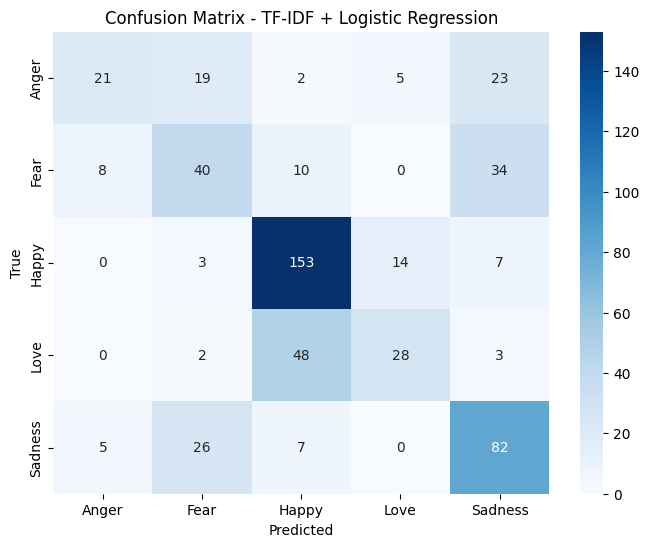


Data: norm
Train: 4314, Val: 539, Test: 540
GPU version failed (module 'pyarrow.lib' has no attribute 'PyExtensionType'), falling back to CPU

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.62      0.30      0.40        70
        Fear       0.44      0.43      0.44        92
       Happy       0.70      0.86      0.77       177
        Love       0.60      0.35      0.44        81
     Sadness       0.55      0.68      0.61       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.53       540
weighted avg       0.60      0.60      0.58       540



<frozen importlib._bootstrap>:488: RuntimeWarning: pyarrow.lib.IpcReadOptions size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject


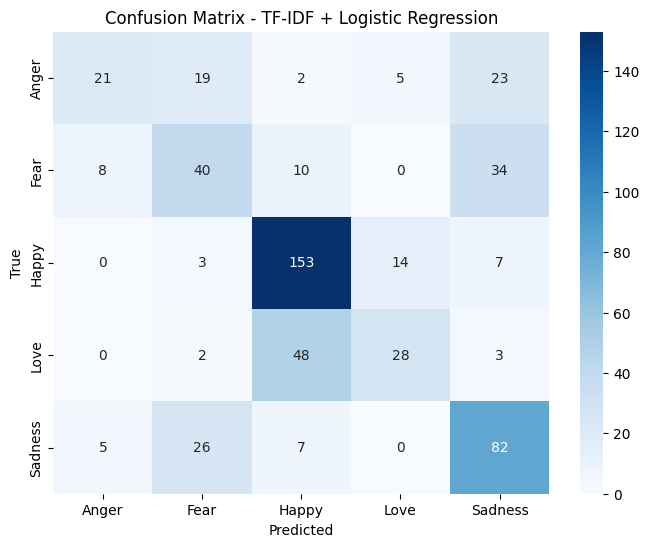

In [18]:
all_results_A2 = []

for dataset_name in CONFIG.DATASETS:
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
                dataset_name, CONFIG.TARGET_COLUMN
            )
            full_train_df = pd.concat([train_df, val_df])
            
            results = train_and_evaluate_baseline_gpu(
                full_train_df, test_df, text_col, CONFIG.TARGET_COLUMN, id2label, seed
            )
            
            run_info = {"dataset": dataset_name, "model": "TF-IDF + LogReg (GPU)", "seed": seed}
            run_info.update(results)
            all_results_A2.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue

In [19]:
if all_results_A2:
    results_df_A2 = pd.DataFrame(all_results_A2)
    print("Final Result for TF-IDF + Logistic Regression (GPU Accelerated)")
    display(results_df_A2)

Final Result for TF-IDF + Logistic Regression (GPU Accelerated)


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params,adapter_size_mb
0,raw,TF-IDF + LogReg (GPU),42,0.603704,0.539241,0.580537,0.530389,0.145028,0,41965,0
1,raw,TF-IDF + LogReg (GPU),2023,0.603704,0.539241,0.580537,0.530389,0.147620,0,41965,0
2,raw,TF-IDF + LogReg (GPU),7,0.603704,0.539241,0.580537,0.530389,0.150910,0,41965,0
3,norm,TF-IDF + LogReg (GPU),42,0.600000,0.532271,0.580725,0.525640,0.155391,0,41850,0
4,norm,TF-IDF + LogReg (GPU),2023,0.600000,0.532271,0.580725,0.525640,0.156318,0,41850,0
5,norm,TF-IDF + LogReg (GPU),7,0.600000,0.532271,0.580725,0.525640,0.149739,0,41850,0


# B. INDOBERTWEET + Full Fine Tuning

In [20]:
all_results_B = []
MODEL_NAME = "indolem/indobertweet-base-uncased"
PEFT_METHOD = "full_ft"

In [21]:
for dataset_name in CONFIG.DATASETS: 
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data( 
                dataset_name, CONFIG.TARGET_COLUMN  
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)

            results = train_and_evaluate_transformer(
                hf_datasets, text_col, MODEL_NAME, PEFT_METHOD, id2label, label2id, seed
            )

            run_info = {"dataset": dataset_name, "model": "IndoBERTweet Full FT", "seed": seed}
            run_info.update(results)
            all_results_B.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.783414,0.683333,0.648956
2,No log,0.727603,0.700000,0.681088
3,No log,0.734341,0.698148,0.676795
4,0.727400,0.752107,0.705556,0.682914


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

       Anger       0.60      0.66      0.63        70
        Fear       0.54      0.53      0.54        92
       Happy       0.87      0.82      0.85       177
        Love       0.68      0.73      0.70        81
     Sadness       0.69      0.68      0.69       120

    accuracy                           0.71       540
   macro avg       0.68      0.69      0.68       540
weighted avg       0.71      0.71      0.71       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.759093,0.685185,0.654684
2,No log,0.720234,0.709259,0.691690
3,No log,0.726867,0.694444,0.673361
4,0.716300,0.751779,0.688889,0.665289


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

       Anger       0.58      0.76      0.66        70
        Fear       0.51      0.48      0.49        92
       Happy       0.88      0.76      0.82       177
        Love       0.64      0.75      0.69        81
     Sadness       0.69      0.64      0.66       120

    accuracy                           0.69       540
   macro avg       0.66      0.68      0.66       540
weighted avg       0.70      0.69      0.69       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.780111,0.692593,0.659735
2,No log,0.734251,0.688889,0.669784
3,No log,0.736541,0.690741,0.668033
4,0.710700,0.751097,0.687037,0.664673


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

       Anger       0.55      0.74      0.63        70
        Fear       0.56      0.47      0.51        92
       Happy       0.88      0.80      0.84       177
        Love       0.67      0.77      0.72        81
     Sadness       0.71      0.68      0.69       120

    accuracy                           0.71       540
   macro avg       0.67      0.69      0.68       540
weighted avg       0.71      0.71      0.71       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.763334,0.673469,0.648450
2,No log,0.691730,0.705009,0.675600
3,No log,0.705146,0.717996,0.687159
4,0.721300,0.716942,0.723562,0.697436


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-42/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-42/checkpoint-405 already exists and is non-empty. Saving will proceed


Classification Report:
              precision    recall  f1-score   support

       Anger       0.69      0.67      0.68        70
        Fear       0.57      0.60      0.59        92
       Happy       0.85      0.79      0.82       177
        Love       0.67      0.78      0.72        81
     Sadness       0.72      0.71      0.71       120

    accuracy                           0.72       540
   macro avg       0.70      0.71      0.70       540
weighted avg       0.73      0.72      0.72       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.763928,0.645640,0.615915
2,No log,0.676887,0.701299,0.670538
3,No log,0.691578,0.714286,0.685152
4,0.715000,0.707409,0.716141,0.686655


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-2023/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-2023/checkpoint-405 already exists and is non-empty. Saving will p


Classification Report:
              precision    recall  f1-score   support

       Anger       0.69      0.67      0.68        70
        Fear       0.57      0.55      0.56        92
       Happy       0.84      0.81      0.82       177
        Love       0.69      0.78      0.73        81
     Sadness       0.70      0.71      0.70       120

    accuracy                           0.72       540
   macro avg       0.70      0.70      0.70       540
weighted avg       0.72      0.72      0.72       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.755110,0.667904,0.641510
2,No log,0.696502,0.716141,0.688541
3,No log,0.709676,0.717996,0.688420
4,0.710700,0.726530,0.712430,0.682126


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-7/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-7/checkpoint-405 already exists and is non-empty. Saving will proceed bu


Classification Report:
              precision    recall  f1-score   support

       Anger       0.64      0.77      0.70        70
        Fear       0.54      0.60      0.57        92
       Happy       0.85      0.81      0.83       177
        Love       0.70      0.74      0.72        81
     Sadness       0.73      0.60      0.66       120

    accuracy                           0.71       540
   macro avg       0.69      0.70      0.70       540
weighted avg       0.72      0.71      0.71       540



In [22]:
if all_results_B:
    results_df_B = pd.DataFrame(all_results_B)
    print("Final Result for INDOBERTWEET Full Fine Tuning")
    display(results_df_B)

Final Result for INDOBERTWEET Full Fine Tuning


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params
0,raw,IndoBERTweet Full FT,42,0.707407,0.680345,0.676667,0.685268,168.688547,2172.220215,110562053
1,raw,IndoBERTweet Full FT,2023,0.685185,0.663755,0.657541,0.678574,177.826128,2176.976074,110562053
2,raw,IndoBERTweet Full FT,7,0.705556,0.678987,0.674886,0.692255,177.723989,2175.313965,110562053
3,norm,IndoBERTweet Full FT,42,0.720370,0.703160,0.700441,0.708135,181.139138,2176.033691,110562053
4,norm,IndoBERTweet Full FT,2023,0.720370,0.700788,0.698883,0.703959,180.810916,2177.981934,110562053
5,norm,IndoBERTweet Full FT,7,0.712963,0.695161,0.691855,0.704711,181.245056,2176.033691,110562053


# C. INDOBERTWEET + LORA

In [23]:
all_results_C = []
MODEL_NAME = "indolem/indobertweet-base-uncased"
PEFT_METHOD = "lora"

In [24]:
for dataset_name in CONFIG.DATASETS:
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(  
                dataset_name, CONFIG.TARGET_COLUMN 
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)
            
            results = train_and_evaluate_transformer(
                hf_datasets, text_col, MODEL_NAME, PEFT_METHOD, id2label, label2id, seed
            )
            
            run_info = {"dataset": dataset_name, "model": "IndoBERTweet LoRA", "seed": seed}
            run_info.update(results)
            all_results_C.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 298,757 || Trainable %: 0.2695


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.198683,0.548148,0.494522
2,No log,0.952880,0.592593,0.571674
3,No log,0.915373,0.614815,0.590989
4,1.116300,0.906634,0.622222,0.597255


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report:
              precision    recall  f1-score   support

       Anger       0.51      0.50      0.50        70
        Fear       0.50      0.45      0.47        92
       Happy       0.87      0.73      0.80       177
        Love       0.56      0.75      0.65        81
     Sadness       0.63      0.68      0.65       120

    accuracy                           0.65       540
   macro avg       0.61      0.62      0.61       540
weighted avg       0.66      0.65      0.65       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 298,757 || Trainable %: 0.2695


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.210012,0.555556,0.510605
2,No log,0.927288,0.592593,0.571025
3,No log,0.887874,0.635185,0.615679
4,1.099800,0.877675,0.624074,0.600811


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report:
              precision    recall  f1-score   support

       Anger       0.49      0.50      0.49        70
        Fear       0.49      0.55      0.52        92
       Happy       0.87      0.76      0.81       177
        Love       0.62      0.75      0.68        81
     Sadness       0.65      0.60      0.63       120

    accuracy                           0.66       540
   macro avg       0.62      0.63      0.63       540
weighted avg       0.67      0.66      0.66       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 298,757 || Trainable %: 0.2695


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.194865,0.553704,0.513416
2,No log,0.938344,0.570370,0.541914
3,No log,0.898203,0.594444,0.566927
4,1.098300,0.888149,0.609259,0.584063


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report:
              precision    recall  f1-score   support

       Anger       0.45      0.50      0.47        70
        Fear       0.50      0.51      0.51        92
       Happy       0.87      0.77      0.81       177
        Love       0.60      0.74      0.66        81
     Sadness       0.64      0.59      0.61       120

    accuracy                           0.65       540
   macro avg       0.61      0.62      0.61       540
weighted avg       0.66      0.65      0.65       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 298,757 || Trainable %: 0.2695


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.240367,0.528757,0.453976
2,No log,0.935770,0.582560,0.542372
3,No log,0.900563,0.597403,0.554645
4,1.118200,0.890998,0.597403,0.561537


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-42/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_downloa


Classification Report:
              precision    recall  f1-score   support

       Anger       0.60      0.60      0.60        70
        Fear       0.57      0.41      0.48        92
       Happy       0.81      0.71      0.76       177
        Love       0.57      0.70      0.63        81
     Sadness       0.56      0.69      0.62       120

    accuracy                           0.64       540
   macro avg       0.62      0.62      0.62       540
weighted avg       0.65      0.64      0.64       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 298,757 || Trainable %: 0.2695


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.180974,0.499072,0.455408
2,No log,0.915524,0.582560,0.544534
3,No log,0.882192,0.608534,0.569418
4,1.092000,0.871979,0.604824,0.571726


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-2023/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_dow


Classification Report:
              precision    recall  f1-score   support

       Anger       0.53      0.60      0.56        70
        Fear       0.49      0.40      0.44        92
       Happy       0.84      0.76      0.80       177
        Love       0.63      0.74      0.68        81
     Sadness       0.57      0.62      0.59       120

    accuracy                           0.64       540
   macro avg       0.61      0.62      0.61       540
weighted avg       0.65      0.64      0.64       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 298,757 || Trainable %: 0.2695


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.125721,0.584416,0.521506
2,No log,0.914344,0.623377,0.594049
3,No log,0.881485,0.636364,0.599379
4,1.084800,0.871120,0.640074,0.608028


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-7/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download`


Classification Report:
              precision    recall  f1-score   support

       Anger       0.59      0.57      0.58        70
        Fear       0.45      0.45      0.45        92
       Happy       0.82      0.76      0.79       177
        Love       0.62      0.69      0.65        81
     Sadness       0.55      0.57      0.56       120

    accuracy                           0.63       540
   macro avg       0.60      0.61      0.61       540
weighted avg       0.63      0.63      0.63       540



In [25]:
if all_results_C:
    results_df_C = pd.DataFrame(all_results_C)
    print("Final Result for INDOBERTWEET + LORA")
    display(results_df_C)

Final Result for INDOBERTWEET + LORA


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params
0,raw,IndoBERTweet LoRA,42,0.646296,0.613772,0.612936,0.623307,130.079802,1317.469238,298757
1,raw,IndoBERTweet LoRA,2023,0.655556,0.626326,0.623958,0.634029,129.238720,1317.469238,298757
2,raw,IndoBERTweet LoRA,7,0.646296,0.614085,0.610920,0.622328,128.777008,1317.469238,298757
3,norm,IndoBERTweet LoRA,42,0.640741,0.617252,0.622176,0.624056,128.871910,1317.469238,298757
4,norm,IndoBERTweet LoRA,2023,0.642593,0.614661,0.611359,0.623329,128.799807,1317.469238,298757
5,norm,IndoBERTweet LoRA,7,0.629630,0.605172,0.603772,0.608100,128.700189,1317.469238,298757


# D. INDOBERT + LORA

In [26]:
all_results_D = []
MODEL_NAME = "indobenchmark/indobert-base-p1"
PEFT_METHOD = "lora"

In [27]:
for dataset_name in CONFIG.DATASETS:  
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(  
                dataset_name, CONFIG.TARGET_COLUMN 
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)
            
            results = train_and_evaluate_transformer(
                hf_datasets, text_col, MODEL_NAME, PEFT_METHOD, id2label, label2id, seed
            )
            
            run_info = {"dataset": dataset_name, "model": "IndoBERT LoRA", "seed": seed}
            run_info.update(results)
            all_results_D.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indobenchmark/indobert-base-p1 | Method: lora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` ins

Trainable params: 298,757 || Trainable %: 0.2395


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.048922,0.542593,0.475052
2,No log,0.978525,0.574074,0.550342
3,No log,0.957389,0.598148,0.570465
4,1.079800,0.951743,0.596296,0.570336


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report:
              precision    recall  f1-score   support

       Anger       0.51      0.43      0.47        70
        Fear       0.44      0.49      0.46        92
       Happy       0.83      0.75      0.79       177
        Love       0.60      0.68      0.64        81
     Sadness       0.57      0.61      0.59       120

    accuracy                           0.62       540
   macro avg       0.59      0.59      0.59       540
weighted avg       0.63      0.62      0.62       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indobenchmark/indobert-base-p1 | Method: lora | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches

Trainable params: 298,757 || Trainable %: 0.2395


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.053631,0.505556,0.435768
2,No log,0.996849,0.561111,0.538168
3,No log,0.977508,0.581481,0.551370
4,1.072900,0.973101,0.587037,0.560275


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report:
              precision    recall  f1-score   support

       Anger       0.41      0.49      0.45        70
        Fear       0.45      0.38      0.41        92
       Happy       0.84      0.72      0.78       177
        Love       0.59      0.72      0.64        81
     Sadness       0.58      0.62      0.60       120

    accuracy                           0.61       540
   macro avg       0.57      0.59      0.58       540
weighted avg       0.62      0.61      0.61       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indobenchmark/indobert-base-p1 | Method: lora | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches

Trainable params: 298,757 || Trainable %: 0.2395


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.045454,0.525926,0.483910
2,No log,0.978244,0.568519,0.542637
3,No log,0.955252,0.590741,0.564331
4,1.064500,0.946556,0.575926,0.551892


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report:
              precision    recall  f1-score   support

       Anger       0.44      0.34      0.39        70
        Fear       0.42      0.64      0.51        92
       Happy       0.84      0.72      0.77       177
        Love       0.58      0.72      0.64        81
     Sadness       0.58      0.46      0.51       120

    accuracy                           0.60       540
   macro avg       0.57      0.58      0.56       540
weighted avg       0.62      0.60      0.60       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indobenchmark/indobert-base-p1 | Method: lora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches

Trainable params: 298,757 || Trainable %: 0.2395


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.033564,0.560297,0.469793
2,No log,0.942431,0.582560,0.550878
3,No log,0.910824,0.595547,0.557122
4,1.068500,0.896886,0.593692,0.562229


Checkpoint destination directory /kaggle/working/models/indobert-base-p1-lora-42/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobert-base-p1-lora-42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated a


Classification Report:
              precision    recall  f1-score   support

       Anger       0.53      0.53      0.53        70
        Fear       0.51      0.41      0.46        92
       Happy       0.80      0.72      0.76       177
        Love       0.58      0.70      0.64        81
     Sadness       0.57      0.65      0.61       120

    accuracy                           0.63       540
   macro avg       0.60      0.60      0.60       540
weighted avg       0.63      0.63      0.63       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indobenchmark/indobert-base-p1 | Method: lora | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches

Trainable params: 298,757 || Trainable %: 0.2395


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.019719,0.552876,0.464407
2,No log,0.957955,0.562152,0.523476
3,No log,0.932868,0.589981,0.545451
4,1.076800,0.919142,0.582560,0.551863


Checkpoint destination directory /kaggle/working/models/indobert-base-p1-lora-2023/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobert-base-p1-lora-2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecat


Classification Report:
              precision    recall  f1-score   support

       Anger       0.47      0.46      0.46        70
        Fear       0.59      0.45      0.51        92
       Happy       0.76      0.67      0.71       177
        Love       0.51      0.64      0.57        81
     Sadness       0.55      0.66      0.60       120

    accuracy                           0.60       540
   macro avg       0.57      0.57      0.57       540
weighted avg       0.61      0.60      0.60       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indobenchmark/indobert-base-p1 | Method: lora | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches

Trainable params: 298,757 || Trainable %: 0.2395


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.017322,0.536178,0.456311
2,No log,0.944329,0.536178,0.507914
3,No log,0.911868,0.567718,0.533585
4,1.060000,0.903289,0.567718,0.541912


Checkpoint destination directory /kaggle/working/models/indobert-base-p1-lora-7/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobert-base-p1-lora-7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and


Classification Report:
              precision    recall  f1-score   support

       Anger       0.52      0.47      0.50        70
        Fear       0.47      0.54      0.50        92
       Happy       0.77      0.65      0.71       177
        Love       0.51      0.69      0.59        81
     Sadness       0.55      0.52      0.53       120

    accuracy                           0.59       540
   macro avg       0.57      0.57      0.57       540
weighted avg       0.60      0.59      0.59       540



In [28]:
if all_results_D:
    results_df_D = pd.DataFrame(all_results_D)
    print("Final Result for INDOBERT + LORA")
    display(results_df_D)

Final Result for INDOBERT + LORA


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params
0,raw,IndoBERT LoRA,42,0.622222,0.589057,0.590706,0.591292,134.623388,1474.655762,298757
1,raw,IndoBERT LoRA,2023,0.611111,0.576836,0.574607,0.586072,134.507071,1474.655762,298757
2,raw,IndoBERT LoRA,7,0.598148,0.564524,0.573176,0.575212,134.676976,1474.655762,298757
3,norm,IndoBERT LoRA,42,0.625926,0.597461,0.597086,0.603696,134.233543,1474.655762,298757
4,norm,IndoBERT LoRA,2023,0.596296,0.569088,0.574226,0.573954,134.267185,1474.655762,298757
5,norm,IndoBERT LoRA,7,0.585185,0.565646,0.566049,0.574530,134.701937,1474.655762,298757


# E. INDOBERTWEET + QLORA

In [29]:
all_results_E = []
MODEL_NAME = "indolem/indobertweet-base-uncased"
PEFT_METHOD = "qlora"

In [30]:
for dataset_name in CONFIG.DATASETS:  # ← CHANGED HERE
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(  # ← CHANGED HERE (6 values)
                dataset_name, CONFIG.TARGET_COLUMN  # ← CHANGED HERE (2 args only)
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)
            
            results = train_and_evaluate_transformer(
                hf_datasets, text_col, MODEL_NAME, PEFT_METHOD, id2label, label2id, seed
            )
            
            run_info = {"dataset": dataset_name, "model": "IndoBERTweet QLoRA", "seed": seed}
            run_info.update(results)
            all_results_E.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: qlora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL: Dataset raw, Seed 42. Error: No package metadata was found for bitsandbytes

Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: qlora | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL: Dataset raw, Seed 2023. Error: No package metadata was found for bitsandbytes

Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: qlora | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL: Dataset raw, Seed 7. Error: No package metadata was found for bitsandbytes

Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: qlora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL: Dataset norm, Seed 42. Error: No package metadata was found for bitsandbytes

Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: qlora | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL: Dataset norm, Seed 2023. Error: No package metadata was found for bitsandbytes

Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: qlora | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL: Dataset norm, Seed 7. Error: No package metadata was found for bitsandbytes


In [31]:
if all_results_E:
    results_df_E = pd.DataFrame(all_results_E)
    print("Final Result for INDOBERTWEET + QLORA")
    display(results_df_E)

# F. INDOBERTWEET + Prefix Tuning

In [32]:
from peft import PrefixTuningConfig

all_results_F = []
MODEL_NAME = "indolem/indobertweet-base-uncased"
PEFT_METHOD = "prefix_tuning"

In [33]:
for dataset_name in CONFIG.DATASETS:
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
                dataset_name, CONFIG.TARGET_COLUMN
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)
            
            set_seed(seed)
            tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
            if tokenizer.pad_token is None: 
                tokenizer.pad_token = tokenizer.eos_token
            
            def tokenize_function(examples):
                return tokenizer(examples[text_col], padding="max_length", truncation=True, max_length=CONFIG.MAX_LENGTH)
            tokenized_datasets = hf_datasets.map(tokenize_function, batched=True)
            
            model = AutoModelForSequenceClassification.from_pretrained(
                MODEL_NAME, num_labels=len(id2label), id2label=id2label, label2id=label2id
            )
            model.to("cuda")
            model.config.pad_token_id = tokenizer.pad_token_id
            
            prefix_config = PrefixTuningConfig(
                task_type=TaskType.SEQ_CLS,
                num_virtual_tokens=50,
                prefix_projection=False
            )
            model = get_peft_model(model, prefix_config)
            model.print_trainable_parameters()
            
            trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
            
            output_path = os.path.join(CONFIG.OUTPUT_DIR, f"{MODEL_NAME.split('/')[-1]}-prefix-{seed}")
            
            def compute_metrics_trainer(eval_pred):
                logits, labels = eval_pred
                predictions = np.argmax(logits, axis=-1)
                return {"accuracy": accuracy_score(labels, predictions), "f1-macro": f1_score(labels, predictions, average="macro")}
            
            training_args = TrainingArguments(
                output_dir=output_path, num_train_epochs=CONFIG.EPOCHS,
                per_device_train_batch_size=CONFIG.BATCH_SIZE, per_device_eval_batch_size=CONFIG.BATCH_SIZE,
                learning_rate=1e-4, weight_decay=0.01, evaluation_strategy="epoch", save_strategy="epoch",
                load_best_model_at_end=True, metric_for_best_model="f1-macro", greater_is_better=True,
                fp16=True, report_to="none"
            )
            trainer = Trainer(
                model=model, args=training_args, train_dataset=tokenized_datasets["train"],
                eval_dataset=tokenized_datasets["validation"], tokenizer=tokenizer, 
                compute_metrics=compute_metrics_trainer,
                callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
            )
            
            torch.cuda.reset_peak_memory_stats()
            start_time = time.time()
            trainer.train()
            total_train_time = time.time() - start_time
            peak_gpu_memory_mb = torch.cuda.max_memory_allocated() / (1024**2)
            
            test_predictions = trainer.predict(tokenized_datasets["test"])
            y_true = test_predictions.label_ids
            y_pred = np.argmax(test_predictions.predictions, axis=-1)
            
            print("\nClassification Report")
            class_names = list(label2id.keys())
            print(classification_report(y_true, y_pred, target_names=class_names))
            
            adapter_path = os.path.join(output_path, "final_adapter")
            model.save_pretrained(adapter_path)
            adapter_size_mb = sum(os.path.getsize(os.path.join(adapter_path, f)) for f in os.listdir(adapter_path)) / (1024**2)
            
            results = {
                "accuracy": accuracy_score(y_true, y_pred),
                "f1-macro": f1_score(y_true, y_pred, average="macro"),
                "precision-macro": precision_score(y_true, y_pred, average="macro"),
                "recall-macro": recall_score(y_true, y_pred, average="macro"),
                "total_train_time": total_train_time,
                "peak_gpu_memory_mb": peak_gpu_memory_mb,
                "num_trainable_params": trainable_params,
                "adapter_size_mb": adapter_size_mb
            }
            
            run_info = {"dataset": dataset_name, "model": "IndoBERTweet Prefix", "seed": seed}
            run_info.update(results)
            all_results_F.append(run_info)
            
            del model, trainer
            gc.collect()
            torch.cuda.empty_cache()
            
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue


Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.498669,0.340741,0.128521
2,No log,1.453813,0.366667,0.166064
3,No log,1.429143,0.390741,0.186171
4,1.497300,1.420497,0.401852,0.195230


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.43      0.03      0.06        92
       Happy       0.41      0.97      0.57       177
        Love       0.00      0.00      0.00        81
     Sadness       0.42      0.39      0.41       120

    accuracy                           0.41       540
   macro avg       0.25      0.28      0.21       540
weighted avg       0.30      0.41      0.29       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/huggingface_hub/fi


Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.474692,0.359259,0.155614
2,No log,1.425021,0.383333,0.180471
3,No log,1.395738,0.412963,0.207972
4,1.475800,1.385773,0.418519,0.211636


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.00      0.00      0.00        92
       Happy       0.40      0.94      0.56       177
        Love       0.00      0.00      0.00        81
     Sadness       0.44      0.45      0.45       120

    accuracy                           0.41       540
   macro avg       0.17      0.28      0.20       540
weighted avg       0.23      0.41      0.28       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/huggingface_hub/fi


Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.484526,0.392593,0.182153
2,No log,1.443583,0.403704,0.199742
3,No log,1.420710,0.414815,0.210062
4,1.489600,1.413062,0.416667,0.211396


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.00      0.00      0.00        92
       Happy       0.40      0.95      0.57       177
        Love       0.43      0.04      0.07        81
     Sadness       0.49      0.47      0.48       120

    accuracy                           0.42       540
   macro avg       0.26      0.29      0.22       540
weighted avg       0.31      0.42      0.30       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/huggingface_hub/fi


Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.499481,0.343228,0.137243
2,No log,1.456631,0.367347,0.163943
3,No log,1.431151,0.371058,0.168525
4,1.500700,1.422346,0.376623,0.173336


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-42/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_dow


Classification Report
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.50      0.02      0.04        92
       Happy       0.39      0.96      0.55       177
        Love       0.00      0.00      0.00        81
     Sadness       0.33      0.26      0.29       120

    accuracy                           0.38       540
   macro avg       0.24      0.25      0.18       540
weighted avg       0.28      0.38      0.25       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/huggingface_hub/fi


Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.485554,0.348794,0.137832
2,No log,1.434589,0.372913,0.167489
3,No log,1.401796,0.384045,0.184402
4,1.474000,1.389907,0.398887,0.199931


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-2023/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume


Classification Report
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.17      0.01      0.02        92
       Happy       0.42      0.97      0.58       177
        Love       1.00      0.01      0.02        81
     Sadness       0.35      0.37      0.36       120

    accuracy                           0.40       540
   macro avg       0.39      0.27      0.20       540
weighted avg       0.39      0.40      0.28       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/huggingface_hub/fi


Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.492760,0.387755,0.183974
2,No log,1.448529,0.400742,0.196584
3,No log,1.423477,0.417440,0.210933
4,1.493000,1.415060,0.428571,0.221603


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-7/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_downl


Classification Report
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.33      0.01      0.02        92
       Happy       0.43      0.96      0.59       177
        Love       0.50      0.04      0.07        81
     Sadness       0.42      0.47      0.45       120

    accuracy                           0.43       540
   macro avg       0.34      0.30      0.23       540
weighted avg       0.37      0.43      0.31       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F1 score of the positive class in binary classification or weighted
/usr/local/lib/python3.12/dist-packages/huggingface_hub/fi

In [34]:
if all_results_F:
    results_df_F = pd.DataFrame(all_results_F)
    print("Final Result for INDOBERTWEET + Prefix Tuning")
    display(results_df_F)

Final Result for INDOBERTWEET + Prefix Tuning


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params,adapter_size_mb
0,raw,IndoBERTweet Prefix,42,0.409259,0.207537,0.250878,0.278075,130.380025,1329.887695,925445,3.535814
1,raw,IndoBERTweet Prefix,2023,0.409259,0.202094,0.169007,0.278701,129.363401,1329.887695,925445,3.535814
2,raw,IndoBERTweet Prefix,7,0.422222,0.223352,0.264114,0.292238,129.247285,1329.887695,925445,3.535814
3,norm,IndoBERTweet Prefix,42,0.375926,0.176218,0.242536,0.248105,129.060428,1329.887695,925445,3.535814
4,norm,IndoBERTweet Prefix,2023,0.401852,0.197814,0.387920,0.271197,129.025569,1329.887695,925445,3.535814
5,norm,IndoBERTweet Prefix,7,0.427778,0.226089,0.336970,0.296672,129.074756,1329.887695,925445,3.535814


# G. INDOBERTWEET + LoRA (All Modules) - Enhanced

In [35]:
"""# G. INDOBERTWEET + LoRA (All Modules) - Enhanced"""

all_results_G = []
MODEL_NAME = "indolem/indobertweet-base-uncased"
PEFT_METHOD = "lora_all"

for dataset_name in CONFIG.DATASETS:
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
                dataset_name, CONFIG.TARGET_COLUMN
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)

            # Modified training with ALL target modules
            set_seed(seed)
            tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
            if tokenizer.pad_token is None:
                tokenizer.pad_token = tokenizer.eos_token

            def tokenize_function(examples):
                return tokenizer(examples[text_col], padding="max_length", 
                                truncation=True, max_length=CONFIG.MAX_LENGTH)
            
            tokenized_datasets = hf_datasets.map(tokenize_function, batched=True)

            model = AutoModelForSequenceClassification.from_pretrained(
                MODEL_NAME, num_labels=len(id2label), 
                id2label=id2label, label2id=label2id
            )
            model.to("cuda")
            model.config.pad_token_id = tokenizer.pad_token_id

            # ⭐ KEY CHANGE: Target ALL linear layers
            lora_config = LoraConfig(
                r=8,
                lora_alpha=16,
                lora_dropout=0.1,
                bias="none",
                task_type=TaskType.SEQ_CLS,
                target_modules=[
                    "query", "key", "value",  # Attention layers
                    "dense",                   # Output projection
                    "attention.output.dense",  # Attention output
                    "output.dense",            # FFN output
                    "intermediate.dense"       # FFN intermediate
                ]
            )
            model = get_peft_model(model, lora_config)
            
            trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
            total_params = sum(p.numel() for p in model.parameters())
            print(f"Trainable: {trainable_params:,} ({100 * trainable_params / total_params:.4f}%)")

            output_path = os.path.join(CONFIG.OUTPUT_DIR, 
                                      f"{MODEL_NAME.split('/')[-1]}-lora-all-{seed}")

            def compute_metrics_trainer(eval_pred):
                logits, labels = eval_pred
                predictions = np.argmax(logits, axis=-1)
                return {
                    "accuracy": accuracy_score(labels, predictions),
                    "f1-macro": f1_score(labels, predictions, average="macro")
                }

            training_args = TrainingArguments(
                output_dir=output_path, 
                num_train_epochs=CONFIG.EPOCHS,
                per_device_train_batch_size=CONFIG.BATCH_SIZE,
                per_device_eval_batch_size=CONFIG.BATCH_SIZE,
                learning_rate=1e-4, 
                weight_decay=0.01,
                evaluation_strategy="epoch", 
                save_strategy="epoch",
                load_best_model_at_end=True, 
                metric_for_best_model="f1-macro",
                greater_is_better=True, 
                fp16=True, 
                report_to="none"
            )
            
            trainer = Trainer(
                model=model, args=training_args,
                train_dataset=tokenized_datasets["train"],
                eval_dataset=tokenized_datasets["validation"],
                tokenizer=tokenizer,
                compute_metrics=compute_metrics_trainer,
                callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
            )

            torch.cuda.reset_peak_memory_stats()
            start_time = time.time()
            trainer.train()
            total_train_time = time.time() - start_time
            peak_gpu_memory_mb = torch.cuda.max_memory_allocated() / (1024**2)

            # Evaluate
            test_predictions = trainer.predict(tokenized_datasets["test"])
            y_true = test_predictions.label_ids
            y_pred = np.argmax(test_predictions.predictions, axis=-1)

            print("\nClassification Report")
            class_names = list(label2id.keys())
            print(classification_report(y_true, y_pred, target_names=class_names))

            # Save adapter
            adapter_path = os.path.join(output_path, "final_adapter")
            model.save_pretrained(adapter_path)
            adapter_size_mb = sum(
                os.path.getsize(os.path.join(adapter_path, f)) 
                for f in os.listdir(adapter_path)
            ) / (1024**2)

            results = {
                "accuracy": accuracy_score(y_true, y_pred),
                "f1-macro": f1_score(y_true, y_pred, average="macro"),
                "precision-macro": precision_score(y_true, y_pred, average="macro"),
                "recall-macro": recall_score(y_true, y_pred, average="macro"),
                "total_train_time": total_train_time,
                "peak_gpu_memory_mb": peak_gpu_memory_mb,
                "num_trainable_params": trainable_params,
                "trainable_params_pct": 100 * trainable_params / total_params,
                "adapter_size_mb": adapter_size_mb
            }

            run_info = {
                "dataset": dataset_name, 
                "model": "IndoBERTweet LoRA-All", 
                "seed": seed
            }
            run_info.update(results)
            all_results_G.append(run_info)

            del model, trainer
            gc.collect()
            torch.cuda.empty_cache()

        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue

if all_results_G:
    results_df_G = pd.DataFrame(all_results_G)
    print("Final Result for INDOBERTWEET + LoRA (All Modules)")
    display(results_df_G)


Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable: 1,343,237 (1.2003%)


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.859906,0.564815,0.365093


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report
              precision    recall  f1-score   support

       Anger       0.61      0.60      0.60        70
        Fear       0.62      0.27      0.38        92
       Happy       0.84      0.89      0.87       177
        Love       0.75      0.64      0.69        81
     Sadness       0.59      0.85      0.69       120

    accuracy                           0.70       540
   macro avg       0.68      0.65      0.65       540
weighted avg       0.70      0.70      0.68       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable: 1,343,237 (1.2003%)


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.841332,0.594444,0.448953
2,No log,0.750760,0.677778,0.630712
3,No log,0.722681,0.683333,0.640180
4,0.859700,0.708360,0.685185,0.643727


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


Classification Report
              precision    recall  f1-score   support

       Anger       0.60      0.60      0.60        70
        Fear       0.57      0.29      0.39        92
       Happy       0.82      0.88      0.85       177
        Love       0.69      0.59      0.64        81
     Sadness       0.61      0.83      0.70       120

    accuracy                           0.69       540
   macro avg       0.66      0.64      0.64       540
weighted avg       0.68      0.69      0.67       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable: 1,343,237 (1.2003%)


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.843912,0.599258,0.437026
2,No log,0.747044,0.641929,0.540591
3,No log,0.713803,0.675325,0.600871
4,0.885700,0.691496,0.686456,0.631594


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-all-42/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-all-42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume


Classification Report
              precision    recall  f1-score   support

       Anger       0.73      0.47      0.57        70
        Fear       0.62      0.37      0.46        92
       Happy       0.76      0.85      0.80       177
        Love       0.69      0.56      0.62        81
     Sadness       0.57      0.83      0.68       120

    accuracy                           0.67       540
   macro avg       0.67      0.62      0.63       540
weighted avg       0.68      0.67      0.66       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable: 1,343,237 (1.2003%)


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.826176,0.597403,0.447180
2,No log,0.734562,0.651206,0.549193
3,No log,0.697640,0.690167,0.621723
4,0.868900,0.681762,0.699443,0.641612


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-all-2023/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-all-2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `re


Classification Report
              precision    recall  f1-score   support

       Anger       0.71      0.49      0.58        70
        Fear       0.55      0.29      0.38        92
       Happy       0.77      0.84      0.80       177
        Love       0.67      0.58      0.62        81
     Sadness       0.55      0.83      0.66       120

    accuracy                           0.66       540
   macro avg       0.65      0.61      0.61       540
weighted avg       0.66      0.66      0.64       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable: 1,343,237 (1.2003%)


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.815198,0.604824,0.460844
2,No log,0.723500,0.660482,0.568157
3,No log,0.691922,0.682746,0.615904
4,0.859100,0.676661,0.712430,0.665117


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-all-7/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-lora-all-7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_d


Classification Report
              precision    recall  f1-score   support

       Anger       0.70      0.47      0.56        70
        Fear       0.54      0.37      0.44        92
       Happy       0.77      0.84      0.80       177
        Love       0.69      0.59      0.64        81
     Sadness       0.57      0.81      0.67       120

    accuracy                           0.67       540
   macro avg       0.66      0.62      0.62       540
weighted avg       0.67      0.67      0.66       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Final Result for INDOBERTWEET + LoRA (All Modules)


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params,trainable_params_pct,adapter_size_mb
0,raw,IndoBERTweet LoRA-All,42,0.701852,0.657977,0.683397,0.651653,152.512587,1342.867188,1343237,1.200334,5.149027
1,raw,IndoBERTweet LoRA-All,2023,0.701852,0.647214,0.682790,0.651274,153.431751,1342.867188,1343237,1.200334,5.149027
2,raw,IndoBERTweet LoRA-All,7,0.688889,0.635064,0.658142,0.639022,152.687725,1342.867188,1343237,1.200334,5.149027
3,norm,IndoBERTweet LoRA-All,42,0.672222,0.626361,0.674160,0.616598,153.142793,1342.867188,1343237,1.200334,5.149027
4,norm,IndoBERTweet LoRA-All,2023,0.659259,0.609677,0.650820,0.605786,152.593141,1342.867188,1343237,1.200334,5.149027
5,norm,IndoBERTweet LoRA-All,7,0.666667,0.622840,0.655272,0.615616,152.577995,1342.867188,1343237,1.200334,5.149027


# H. INDOBERTWEET + Prefix Tuning (Fixed with MLP)

In [36]:
"""# H. INDOBERTWEET + Prefix Tuning (Fixed with MLP)"""

all_results_H = []
MODEL_NAME = "indolem/indobertweet-base-uncased"

for dataset_name in CONFIG.DATASETS:
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
                dataset_name, CONFIG.TARGET_COLUMN
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)

            set_seed(seed)
            tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
            if tokenizer.pad_token is None:
                tokenizer.pad_token = tokenizer.eos_token

            def tokenize_function(examples):
                return tokenizer(examples[text_col], padding="max_length", 
                                truncation=True, max_length=CONFIG.MAX_LENGTH)
            
            tokenized_datasets = hf_datasets.map(tokenize_function, batched=True)

            model = AutoModelForSequenceClassification.from_pretrained(
                MODEL_NAME, num_labels=len(id2label), 
                id2label=id2label, label2id=label2id
            )
            model.to("cuda")
            model.config.pad_token_id = tokenizer.pad_token_id

            # ⭐ KEY CHANGE: Enable prefix_projection with MLP
            prefix_config = PrefixTuningConfig(
                task_type=TaskType.SEQ_CLS,
                num_virtual_tokens=20,
                prefix_projection=True,           # ← CRITICAL: Enable MLP reparameterization
                encoder_hidden_size=512           # ← MLP hidden size for stability
            )
            model = get_peft_model(model, prefix_config)
            model.print_trainable_parameters()
            
            trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
            total_params = sum(p.numel() for p in model.parameters())

            output_path = os.path.join(CONFIG.OUTPUT_DIR, 
                                      f"{MODEL_NAME.split('/')[-1]}-prefix-fixed-{seed}")

            def compute_metrics_trainer(eval_pred):
                logits, labels = eval_pred
                predictions = np.argmax(logits, axis=-1)
                return {
                    "accuracy": accuracy_score(labels, predictions),
                    "f1-macro": f1_score(labels, predictions, average="macro")
                }

            training_args = TrainingArguments(
                output_dir=output_path, 
                num_train_epochs=CONFIG.EPOCHS,
                per_device_train_batch_size=CONFIG.BATCH_SIZE,
                per_device_eval_batch_size=CONFIG.BATCH_SIZE,
                learning_rate=1e-3,  # Slightly higher LR for prefix tuning
                weight_decay=0.01,
                evaluation_strategy="epoch", 
                save_strategy="epoch",
                load_best_model_at_end=True, 
                metric_for_best_model="f1-macro",
                greater_is_better=True, 
                fp16=True, 
                report_to="none"
            )
            
            trainer = Trainer(
                model=model, args=training_args,
                train_dataset=tokenized_datasets["train"],
                eval_dataset=tokenized_datasets["validation"],
                tokenizer=tokenizer,
                compute_metrics=compute_metrics_trainer,
                callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
            )

            torch.cuda.reset_peak_memory_stats()
            start_time = time.time()
            trainer.train()
            total_train_time = time.time() - start_time
            peak_gpu_memory_mb = torch.cuda.max_memory_allocated() / (1024**2)

            # Evaluate
            test_predictions = trainer.predict(tokenized_datasets["test"])
            y_true = test_predictions.label_ids
            y_pred = np.argmax(test_predictions.predictions, axis=-1)

            print("\nClassification Report")
            class_names = list(label2id.keys())
            print(classification_report(y_true, y_pred, target_names=class_names))

            # Save adapter
            adapter_path = os.path.join(output_path, "final_adapter")
            model.save_pretrained(adapter_path)
            adapter_size_mb = sum(
                os.path.getsize(os.path.join(adapter_path, f)) 
                for f in os.listdir(adapter_path)
            ) / (1024**2)

            results = {
                "accuracy": accuracy_score(y_true, y_pred),
                "f1-macro": f1_score(y_true, y_pred, average="macro"),
                "precision-macro": precision_score(y_true, y_pred, average="macro"),
                "recall-macro": recall_score(y_true, y_pred, average="macro"),
                "total_train_time": total_train_time,
                "peak_gpu_memory_mb": peak_gpu_memory_mb,
                "num_trainable_params": trainable_params,
                "trainable_params_pct": 100 * trainable_params / total_params,
                "adapter_size_mb": adapter_size_mb
            }

            run_info = {
                "dataset": dataset_name, 
                "model": "IndoBERTweet Prefix-Fixed", 
                "seed": seed
            }
            run_info.update(results)
            all_results_H.append(run_info)

            del model, trainer
            gc.collect()
            torch.cuda.empty_cache()

        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue

if all_results_H:
    results_df_H = pd.DataFrame(all_results_H)
    print("Final Result for INDOBERTWEET + Prefix Tuning (Fixed)")
    display(results_df_H)


Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 9,868,549 || all params: 120,430,602 || trainable%: 8.19438650651269


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.546456,0.346296,0.185752
2,No log,1.539143,0.344444,0.157000
3,No log,1.531294,0.340741,0.142372


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 

!!! GAGAL: Dataset raw, Seed 42. Error: Error(s) in loading state_dict for Embedding:
	size mismatch for weight: copying a param with shape torch.Size([20, 18432]) from checkpoint, the shape in current model is torch.Size([20, 768]).

Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 9,868,549 || all params: 120,430,602 || trainable%: 8.19438650651269


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.905302,0.575926,0.441881
2,No log,0.807816,0.653704,0.614857
3,No log,0.756558,0.668519,0.644211
4,0.894900,0.706611,0.701852,0.660505


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 

!!! GAGAL: Dataset raw, Seed 2023. Error: Error(s) in loading state_dict for Embedding:
	size mismatch for weight: copying a param with shape torch.Size([20, 18432]) from checkpoint, the shape in current model is torch.Size([20, 768]).

Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 9,868,549 || all params: 120,430,602 || trainable%: 8.19438650651269


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.947790,0.568519,0.408460
2,No log,0.811387,0.638889,0.593123
3,No log,0.707327,0.690741,0.659750
4,0.866200,0.707171,0.688889,0.656754


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 

!!! GAGAL: Dataset raw, Seed 7. Error: Error(s) in loading state_dict for Embedding:
	size mismatch for weight: copying a param with shape torch.Size([20, 18432]) from checkpoint, the shape in current model is torch.Size([20, 768]).

Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 9,868,549 || all params: 120,430,602 || trainable%: 8.19438650651269


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.940711,0.519481,0.430476
2,No log,0.757775,0.677180,0.620158
3,No log,0.683049,0.716141,0.658169
4,0.868300,0.635855,0.719852,0.675624


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-fixed-42/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-fixed-42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning:

!!! GAGAL: Dataset norm, Seed 42. Error: Error(s) in loading state_dict for Embedding:
	size mismatch for weight: copying a param with shape torch.Size([20, 18432]) from checkpoint, the shape in current model is torch.Size([20, 768]).

Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 9,868,549 || all params: 120,430,602 || trainable%: 8.19438650651269


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.911136,0.573284,0.481180
2,No log,0.829361,0.623377,0.583893
3,No log,0.717974,0.684601,0.613626
4,0.914200,0.649994,0.743970,0.706338


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-fixed-2023/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-fixed-2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarn

!!! GAGAL: Dataset norm, Seed 2023. Error: Error(s) in loading state_dict for Embedding:
	size mismatch for weight: copying a param with shape torch.Size([20, 18432]) from checkpoint, the shape in current model is torch.Size([20, 768]).

Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

trainable params: 9,868,549 || all params: 120,430,602 || trainable%: 8.19438650651269


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.532342,0.346939,0.161315
2,No log,1.533107,0.348794,0.165635
3,No log,1.526083,0.345083,0.141848
4,1.551000,1.521100,0.363636,0.182726


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-fixed-7/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-prefix-fixed-7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `

!!! GAGAL: Dataset norm, Seed 7. Error: Error(s) in loading state_dict for Embedding:
	size mismatch for weight: copying a param with shape torch.Size([20, 18432]) from checkpoint, the shape in current model is torch.Size([20, 768]).


# I. INDOBERT + Full Fine Tuning

In [37]:
all_results_I = []
MODEL_NAME = "indolem/indobertweet-base-uncased"
PEFT_METHOD = "full_ft"

In [38]:
for dataset_name in CONFIG.DATASETS: 
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data( 
                dataset_name, CONFIG.TARGET_COLUMN  
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)

            results = train_and_evaluate_transformer(
                hf_datasets, text_col, MODEL_NAME, PEFT_METHOD, id2label, label2id, seed
            )

            run_info = {"dataset": dataset_name, "model": "IndoBERT Full FT", "seed": seed}
            run_info.update(results)
            all_results_G.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.783414,0.683333,0.648956
2,No log,0.727603,0.700000,0.681088
3,No log,0.734341,0.698148,0.676795
4,0.727400,0.752107,0.705556,0.682914


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-42/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-42/checkpoint-405 already exists and is non-empty. Saving will proceed


Classification Report:
              precision    recall  f1-score   support

       Anger       0.60      0.66      0.63        70
        Fear       0.54      0.53      0.54        92
       Happy       0.87      0.82      0.85       177
        Love       0.68      0.73      0.70        81
     Sadness       0.69      0.68      0.69       120

    accuracy                           0.71       540
   macro avg       0.68      0.69      0.68       540
weighted avg       0.71      0.71      0.71       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.759093,0.685185,0.654684
2,No log,0.720234,0.709259,0.691690
3,No log,0.726867,0.694444,0.673361
4,0.716300,0.751779,0.688889,0.665289


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-2023/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-2023/checkpoint-405 already exists and is non-empty. Saving will p


Classification Report:
              precision    recall  f1-score   support

       Anger       0.58      0.76      0.66        70
        Fear       0.51      0.48      0.49        92
       Happy       0.88      0.76      0.82       177
        Love       0.64      0.75      0.69        81
     Sadness       0.69      0.64      0.66       120

    accuracy                           0.69       540
   macro avg       0.66      0.68      0.66       540
weighted avg       0.70      0.69      0.69       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.780111,0.692593,0.659735
2,No log,0.734251,0.688889,0.669784
3,No log,0.736541,0.690741,0.668033
4,0.710700,0.751097,0.687037,0.664673


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-7/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-7/checkpoint-405 already exists and is non-empty. Saving will proceed bu


Classification Report:
              precision    recall  f1-score   support

       Anger       0.55      0.74      0.63        70
        Fear       0.56      0.47      0.51        92
       Happy       0.88      0.80      0.84       177
        Love       0.67      0.77      0.72        81
     Sadness       0.71      0.68      0.69       120

    accuracy                           0.71       540
   macro avg       0.67      0.69      0.68       540
weighted avg       0.71      0.71      0.71       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.763334,0.673469,0.648450
2,No log,0.691730,0.705009,0.675600
3,No log,0.705146,0.717996,0.687159
4,0.721300,0.716942,0.723562,0.697436


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-42/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-42/checkpoint-405 already exists and is non-empty. Saving will proceed


Classification Report:
              precision    recall  f1-score   support

       Anger       0.69      0.67      0.68        70
        Fear       0.57      0.60      0.59        92
       Happy       0.85      0.79      0.82       177
        Love       0.67      0.78      0.72        81
     Sadness       0.72      0.71      0.71       120

    accuracy                           0.72       540
   macro avg       0.70      0.71      0.70       540
weighted avg       0.73      0.72      0.72       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.763928,0.645640,0.615915
2,No log,0.676887,0.701299,0.670538
3,No log,0.691578,0.714286,0.685152
4,0.715000,0.707409,0.716141,0.686655


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-2023/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-2023/checkpoint-405 already exists and is non-empty. Saving will p


Classification Report:
              precision    recall  f1-score   support

       Anger       0.69      0.67      0.68        70
        Fear       0.57      0.55      0.56        92
       Happy       0.84      0.81      0.82       177
        Love       0.69      0.78      0.73        81
     Sadness       0.70      0.71      0.70       120

    accuracy                           0.72       540
   macro avg       0.70      0.70      0.70       540
weighted avg       0.72      0.72      0.72       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,0.755110,0.667904,0.641510
2,No log,0.696502,0.716141,0.688541
3,No log,0.709676,0.717996,0.688420
4,0.710700,0.726530,0.712430,0.682126


Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-7/checkpoint-135 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Checkpoint destination directory /kaggle/working/models/indobertweet-base-uncased-full_ft-7/checkpoint-405 already exists and is non-empty. Saving will proceed bu


Classification Report:
              precision    recall  f1-score   support

       Anger       0.64      0.77      0.70        70
        Fear       0.54      0.60      0.57        92
       Happy       0.85      0.81      0.83       177
        Love       0.70      0.74      0.72        81
     Sadness       0.73      0.60      0.66       120

    accuracy                           0.71       540
   macro avg       0.69      0.70      0.70       540
weighted avg       0.72      0.71      0.71       540



In [39]:
if all_results_I:
    results_df_I = pd.DataFrame(all_results_I)
    print("Final Result for INDOBERT Full Fine Tuning")
    display(results_df_I)

# Results

In [40]:
if 'all_results_A' not in locals(): all_results_A = []  # TF-IDF
if 'all_results_B' not in locals(): all_results_B = []  # Full FT
if 'all_results_C' not in locals(): all_results_C = []  # IndoBERTweet LoRA
if 'all_results_D' not in locals(): all_results_D = []  # IndoBERT LoRA
if 'all_results_E' not in locals(): all_results_E = []  # IndoBERTweet QLoRA
if 'all_results_F' not in locals(): all_results_F = []  # IndoBERTweet Full FT
if 'all_results_G' not in locals(): all_results_G = []  # IndoBERTweet LoRA (All Modules) - Enhanced
if 'all_results_H' not in locals(): all_results_H = []  # IndoBERTweet Prefix Tuning (Fixed with MLP)
if 'all_results_I' not in locals(): all_results_I = []  # IndoBERT Full FT

all_results_combined = all_results_A + all_results_B + all_results_C + all_results_D + all_results_E + all_results_F + all_results_G + all_results_H + all_results_I

if all_results_combined:
    results_df = pd.DataFrame(all_results_combined)
    
    # Mean & Standard Deviation
    summary_df = results_df.groupby(['dataset', 'model']).agg(
        f1_macro_mean=('f1-macro', 'mean'),
        f1_macro_std=('f1-macro', 'std'),
        accuracy_mean=('accuracy', 'mean'),
        accuracy_std=('accuracy', 'std'),
        train_time_mean=('total_train_time', 'mean'),
        gpu_mem_mean=('peak_gpu_memory_mb', 'mean'),
        trainable_params=('num_trainable_params', 'first'),
        adapter_size_mean=('adapter_size_mb', 'mean')
    ).reset_index()
    
    def format_with_std(mean, std):
        std_val = std if pd.notna(std) else 0
        return f"{mean:.4f} ± {std_val:.4f}"
    
    summary_df['F1-Macro'] = summary_df.apply(lambda r: format_with_std(r['f1_macro_mean'], r['f1_macro_std']), axis=1)
    summary_df['Accuracy'] = summary_df.apply(lambda r: format_with_std(r['accuracy_mean'], r['accuracy_std']), axis=1)
    
    # Sort BEFORE renaming columns
    summary_df = summary_df.sort_values(by=['dataset', 'f1_macro_mean'], ascending=[True, False])
    
    # Now create final report with renamed columns
    final_report = summary_df[[
        'dataset', 'model', 'F1-Macro', 'Accuracy',
        'train_time_mean', 'gpu_mem_mean', 'trainable_params', 'adapter_size_mean'
    ]].copy()
    
    final_report.columns = ['Dataset', 'Model', 'F1-Macro', 'Accuracy', 'Avg Time (s)', 'Avg Peak GPU (MB)', '# Trainable Params', 'Adapter Size (MB)']
    
    print("\n\nResults Table")
    display(final_report)
    
    final_report.to_csv('/kaggle/working/final_results_summary.csv', index=False)
    
else:
    print("\nError.")



Results Table


,Dataset,Model,F1-Macro,Accuracy,Avg Time (s),Avg Peak GPU (MB),# Trainable Params,Adapter Size (MB)
0,norm,IndoBERT Full FT,0.6997 ± 0.0041,0.7179 ± 0.0043,180.059480,2739.293783,110562053,NaN
2,norm,IndoBERTweet Full FT,0.6997 ± 0.0041,0.7179 ± 0.0043,181.065037,2176.683105,110562053,NaN
4,norm,IndoBERTweet LoRA-All,0.6196 ± 0.0088,0.6660 ± 0.0065,152.771310,1342.867188,1343237,5.149027
3,norm,IndoBERTweet LoRA,0.6124 ± 0.0064,0.6377 ± 0.0070,128.790635,1317.469238,298757,NaN
1,norm,IndoBERT LoRA,0.5774 ± 0.0175,0.6025 ± 0.0211,134.400888,1474.655762,298757,NaN
6,norm,TF-IDF + LogReg,0.5323 ± 0.0000,0.6000 ± 0.0000,0.145114,0.000000,41850,0.000000
5,norm,IndoBERTweet Prefix,0.2000 ± 0.0250,0.4019 ± 0.0259,129.053584,1329.887695,925445,3.535814
7,raw,IndoBERT Full FT,0.6744 ± 0.0092,0.6994 ± 0.0123,179.622624,2741.445801,110562053,NaN
9,raw,IndoBERTweet Full FT,0.6744 ± 0.0092,0.6994 ± 0.0123,174.746222,2174.836751,110562053,NaN
11,raw,IndoBERTweet LoRA-All,0.6468 ± 0.0115,0.6975 ± 0.0075,152.877354,1342.867188,1343237,5.149027


In [41]:
if all_results_combined:
    results_df = pd.DataFrame(all_results_combined)
    print(results_df.groupby(['dataset', 'model'])['seed'].count())
    display(results_df)

dataset  model                
norm     IndoBERT Full FT         3
         IndoBERT LoRA            3
         IndoBERTweet Full FT     3
         IndoBERTweet LoRA        3
         IndoBERTweet LoRA-All    3
         IndoBERTweet Prefix      3
         TF-IDF + LogReg          3
raw      IndoBERT Full FT         3
         IndoBERT LoRA            3
         IndoBERTweet Full FT     3
         IndoBERTweet LoRA        3
         IndoBERTweet LoRA-All    3
         IndoBERTweet Prefix      3
         TF-IDF + LogReg          3
Name: seed, dtype: int64


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params,adapter_size_mb,trainable_params_pct
0,raw,TF-IDF + LogReg,42,0.603704,0.539241,0.580537,0.530389,0.161469,0.000000,41965,0.000000,NaN
1,raw,TF-IDF + LogReg,2023,0.603704,0.539241,0.580537,0.530389,0.552945,0.000000,41965,0.000000,NaN
2,raw,TF-IDF + LogReg,7,0.603704,0.539241,0.580537,0.530389,0.150471,0.000000,41965,0.000000,NaN
3,norm,TF-IDF + LogReg,42,0.600000,0.532271,0.580725,0.525640,0.142678,0.000000,41850,0.000000,NaN
4,norm,TF-IDF + LogReg,2023,0.600000,0.532271,0.580725,0.525640,0.147023,0.000000,41850,0.000000,NaN
5,norm,TF-IDF + LogReg,7,0.600000,0.532271,0.580725,0.525640,0.145641,0.000000,41850,0.000000,NaN
6,raw,IndoBERTweet Full FT,42,0.707407,0.680345,0.676667,0.685268,168.688547,2172.220215,110562053,NaN,NaN
7,raw,IndoBERTweet Full FT,2023,0.685185,0.663755,0.657541,0.678574,177.826128,2176.976074,110562053,NaN,NaN
8,raw,IndoBERTweet Full FT,7,0.705556,0.678987,0.674886,0.692255,177.723989,2175.313965,110562053,NaN,NaN
9,norm,IndoBERTweet Full FT,42,0.720370,0.703160,0.700441,0.708135,181.139138,2176.033691,110562053,NaN,NaN


# Parameter Efficiency Analysis


PARAMETER EFFICIENCY ANALYSIS


,Dataset,Model,F1-Macro,Trainable %,Param Efficiency,Speed Efficiency,Memory Efficiency
0,norm,IndoBERT Full FT,0.6997,100.0000,0.0070,0.0039,0.0003
1,norm,IndoBERT LoRA,0.5774,0.2702,2.1368,0.0043,0.0004
2,norm,IndoBERTweet Full FT,0.6997,100.0000,0.0070,0.0039,0.0003
3,norm,IndoBERTweet LoRA,0.6124,0.2702,2.2662,0.0048,0.0005
4,norm,IndoBERTweet LoRA-All,0.6196,1.2149,0.5100,0.0041,0.0005
5,norm,IndoBERTweet Prefix,0.2000,0.8370,0.2390,0.0016,0.0002
6,norm,TF-IDF + LogReg,0.5323,0.0379,14.0619,3.6679,inf
7,raw,IndoBERT Full FT,0.6744,100.0000,0.0067,0.0038,0.0002
8,raw,IndoBERT LoRA,0.5768,0.2702,2.1346,0.0043,0.0004
9,raw,IndoBERTweet Full FT,0.6744,100.0000,0.0067,0.0039,0.0003


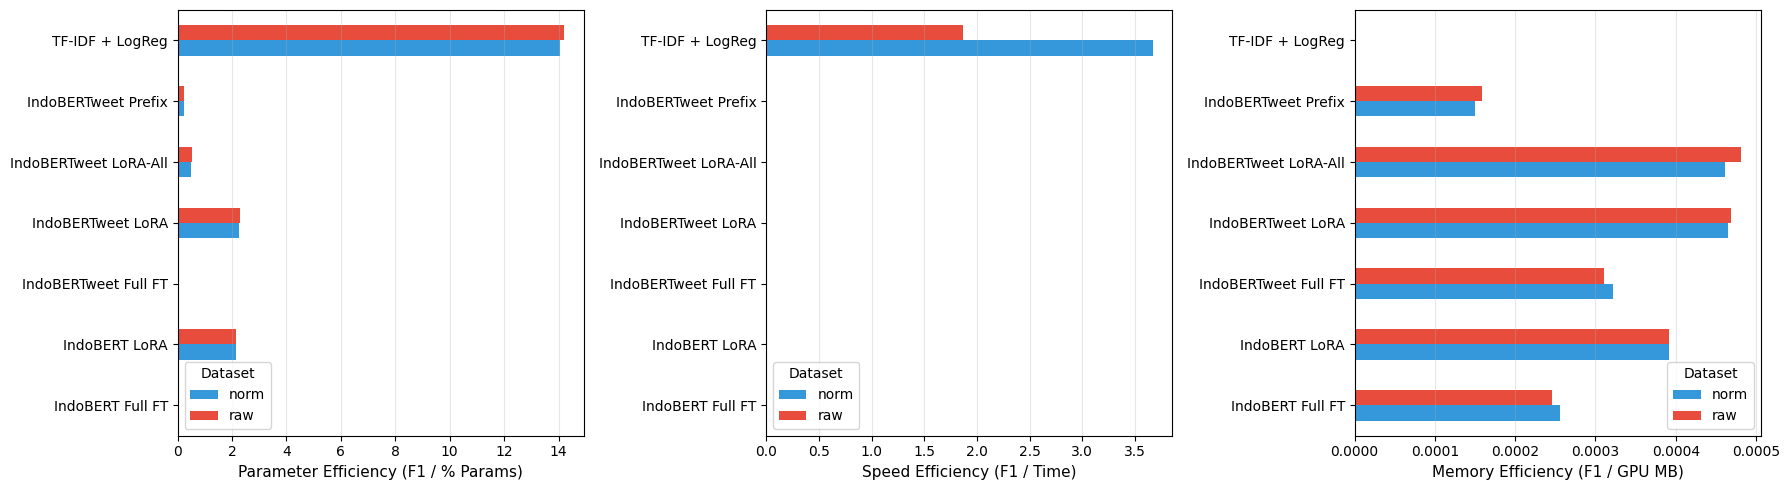

In [42]:
"""# Parameter Efficiency Analysis"""

# Add this to your results summary section
if all_results_combined:
    results_df = pd.DataFrame(all_results_combined)
    
    # Calculate efficiency metrics
    summary_df = results_df.groupby(['dataset', 'model']).agg({
        'f1-macro': ['mean', 'std'],
        'accuracy': ['mean', 'std'],
        'total_train_time': 'mean',
        'peak_gpu_memory_mb': 'mean',
        'num_trainable_params': 'first',
        'trainable_params_pct': 'first',  # If you added this
        'adapter_size_mb': 'mean'
    }).reset_index()
    
    summary_df.columns = ['_'.join(col).strip('_') for col in summary_df.columns]
    
    # Get baseline (Full FT) trainable params
    full_ft_params = summary_df[
        summary_df['model'].str.contains('Full FT')
    ]['num_trainable_params_first'].values[0]
    
    # Calculate efficiency scores
    summary_df['trainable_pct'] = (
        summary_df['num_trainable_params_first'] / full_ft_params * 100
    )
    
    # ⭐ EFFICIENCY RATIO: F1 / % Trainable Params
    summary_df['efficiency_ratio'] = (
        summary_df['f1-macro_mean'] / summary_df['trainable_pct']
    )
    
    # ⭐ SPEED EFFICIENCY: F1 / Training Time
    summary_df['speed_efficiency'] = (
        summary_df['f1-macro_mean'] / summary_df['total_train_time_mean']
    )
    
    # ⭐ MEMORY EFFICIENCY: F1 / GPU Memory
    summary_df['memory_efficiency'] = (
        summary_df['f1-macro_mean'] / summary_df['peak_gpu_memory_mb_mean']
    )
    
    # Create efficiency table
    efficiency_table = summary_df[[
        'dataset', 'model', 
        'f1-macro_mean', 
        'trainable_pct',
        'efficiency_ratio',
        'speed_efficiency',
        'memory_efficiency'
    ]].copy()
    
    efficiency_table.columns = [
        'Dataset', 'Model', 'F1-Macro', 
        'Trainable %', 'Param Efficiency', 
        'Speed Efficiency', 'Memory Efficiency'
    ]
    
    print("\n" + "="*80)
    print("PARAMETER EFFICIENCY ANALYSIS")
    print("="*80)
    display(efficiency_table.round(4))
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, (metric, title) in enumerate([
        ('efficiency_ratio', 'Parameter Efficiency (F1 / % Params)'),
        ('speed_efficiency', 'Speed Efficiency (F1 / Time)'),
        ('memory_efficiency', 'Memory Efficiency (F1 / GPU MB)')
    ]):
        pivot = summary_df.pivot(index='model', columns='dataset', values=metric)
        pivot.plot(kind='barh', ax=axes[idx], color=['#3498db', '#e74c3c'])
        axes[idx].set_xlabel(title, fontsize=11)
        axes[idx].set_ylabel('')
        axes[idx].legend(title='Dataset')
        axes[idx].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/efficiency_ratios.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    efficiency_table.to_csv('/kaggle/working/efficiency_analysis.csv', index=False)

# Cross-Domain Generalization Analysis (Enhanced)

In [43]:
"""# Cross-Domain Generalization Analysis (Enhanced)"""
cross_domain_results_detailed = []
models_to_test = [
    ("indolem/indobertweet-base-uncased", "full_ft", "IndoBERTweet Full FT"),
    ("indobenchmark/indobert-base-p1", "full_ft", "IndoBERT Full FT"),
    ("indolem/indobertweet-base-uncased", "lora", "IndoBERTweet LoRA"),
    ("indolem/indobertweet-base-uncased", "lora_all", "IndoBERTweet LoRA-All"),
    ("indobenchmark/indobert-base-p1", "lora", "IndoBERT LoRA"),
]

domain_pairs = [
    ('raw', 'norm'),
    ('norm', 'raw'),
]

for model_name, peft_method, model_label in models_to_test:
    for train_domain, test_domain in domain_pairs:
        print(f"\nTrain on {train_domain} → Test on {test_domain} | Model: {model_label}")
        
        try:
            # Load TRAINING domain
            train_df, val_df, _, id2label, label2id, text_col_train = load_presplit_data(
                train_domain, CONFIG.TARGET_COLUMN
            )
            
            # Load IN-DOMAIN test (same as training)
            _, _, test_in_df, _, _, _ = load_presplit_data(
                train_domain, CONFIG.TARGET_COLUMN
            )
            
            # Load CROSS-DOMAIN test (different from training)
            _, _, test_cross_df, _, _, text_col_cross = load_presplit_data(
                test_domain, CONFIG.TARGET_COLUMN
            )
            
            # Train model (use seed 42 only for speed)
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_in_df)
            
            # Quick training function inline
            set_seed(42)
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            if tokenizer.pad_token is None:
                tokenizer.pad_token = tokenizer.eos_token
            
            def tokenize_function(examples):
                return tokenizer(examples[text_col_train], padding="max_length", truncation=True, max_length=64)
            
            tokenized_train = hf_datasets.map(tokenize_function, batched=True)
            
            # Load and configure model
            model = AutoModelForSequenceClassification.from_pretrained(
                model_name, num_labels=len(id2label), id2label=id2label, label2id=label2id
            )
            model.to("cuda")
            model.config.pad_token_id = tokenizer.pad_token_id
            
            if peft_method == "lora":
                lora_config = LoraConfig(
                    r=8,
                    lora_alpha=16,
                    lora_dropout=0.1,
                    bias="none",
                    task_type=TaskType.SEQ_CLS,
                    target_modules=["query", "value"]
                )
                model = get_peft_model(model, lora_config)
            
            elif peft_method == "lora_all":
                lora_config = LoraConfig(
                    r=8,
                    lora_alpha=16,
                    lora_dropout=0.1,
                    bias="none",
                    task_type=TaskType.SEQ_CLS,
                    target_modules=["query", "key", "value", "dense"]
                )
                model = get_peft_model(model, lora_config)
            
            training_args = TrainingArguments(
                output_dir=f"/tmp/{model_label}-{train_domain}",
                num_train_epochs=2,  # Reduced for speed
                per_device_train_batch_size=16,
                per_device_eval_batch_size=16,
                learning_rate=1e-4,
                fp16=True,
                report_to="none",
                evaluation_strategy="no"
            )
            
            trainer = Trainer(
                model=model, args=training_args,
                train_dataset=tokenized_train["train"],
                tokenizer=tokenizer
            )
            
            trainer.train()
            
            # Evaluate IN-DOMAIN
            preds_in = trainer.predict(tokenized_train["test"])
            y_true_in = preds_in.label_ids
            y_pred_in = np.argmax(preds_in.predictions, axis=-1)
            f1_in = f1_score(y_true_in, y_pred_in, average='macro')
            
            # Evaluate CROSS-DOMAIN
            # Tokenize cross-domain test with correct text column
            cross_dataset = Dataset.from_pandas(test_cross_df)
            
            # Ensure Trainer-compatible label column
            if CONFIG.TARGET_COLUMN != "label":
                cross_dataset = cross_dataset.rename_column(CONFIG.TARGET_COLUMN, "label")
            
            cross_dataset = cross_dataset.remove_columns(
                [col for col in cross_dataset.column_names if col not in [text_col_cross, "label"]]
            )

            
            def tokenize_cross(examples):
                return tokenizer(examples[text_col_cross], padding="max_length", truncation=True, max_length=64)
            
            tokenized_cross = cross_dataset.map(tokenize_cross, batched=True)
            
            preds_cross = trainer.predict(tokenized_cross)
            y_true_cross = preds_cross.label_ids
            y_pred_cross = np.argmax(preds_cross.predictions, axis=-1)
            f1_cross = f1_score(y_true_cross, y_pred_cross, average='macro')
            
            # Compute ΔF1
            delta_f1 = f1_in - f1_cross
            
            print(f"   In-domain F1:    {f1_in:.4f}")
            print(f"   Cross-domain F1: {f1_cross:.4f}")
            print(f"   ΔF1:             {delta_f1:.4f} ({delta_f1*100:+.2f}%)")
            
            cross_domain_results_detailed.append({
                'model': model_label,
                'train_domain': train_domain,
                'test_domain': test_domain,
                'f1_in_domain': f1_in,
                'f1_cross_domain': f1_cross,
                'delta_f1': delta_f1
            })
            
            del model, trainer
            gc.collect()
            torch.cuda.empty_cache()
            
        except Exception as e:
            print(f"Failed: {e}")
            continue

# After collecting results, create heatmap
if cross_domain_results_detailed:
    cross_df = pd.DataFrame(cross_domain_results_detailed)
    
    # Calculate generalization metrics
    cross_df['performance_retention'] = (
        cross_df['f1_cross_domain'] / cross_df['f1_in_domain'] * 100
    )
    cross_df['generalization_gap'] = cross_df['delta_f1']
    
    # Create pivot for heatmap
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Heatmap 1: Performance Retention %
    pivot1 = cross_df.pivot_table(
        index='model',
        columns='train_domain',
        values='performance_retention',
        aggfunc='mean'
    )
    
    sns.heatmap(
        pivot1, 
        annot=True, 
        fmt='.1f', 
        cmap='RdYlGn',
        center=85,  # 85% retention = yellow
        vmin=60, 
        vmax=100,
        ax=axes[0],
        cbar_kws={'label': 'Performance Retention (%)'}
    )
    axes[0].set_title('Cross-Domain Performance Retention', fontweight='bold')
    axes[0].set_ylabel('')
    
    # Heatmap 2: Generalization Gap (ΔF1)
    pivot2 = cross_df.pivot_table(
        index='model',
        columns='train_domain',
        values='delta_f1',
        aggfunc='mean'
    )
    
    sns.heatmap(
        pivot2, 
        annot=True, 
        fmt='.3f', 
        cmap='RdYlGn_r',  # Reversed: lower gap = better
        center=0.05,
        vmin=0, 
        vmax=0.15,
        ax=axes[1],
        cbar_kws={'label': 'ΔF1 (lower = better)'}
    )
    axes[1].set_title('Generalization Gap (In-Domain - Cross-Domain)', 
                      fontweight='bold')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/cross_domain_heatmap.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    # Statistical summary
    print("\n" + "="*80)
    print("CROSS-DOMAIN GENERALIZATION SUMMARY")
    print("="*80)
    
    summary_gen = cross_df.groupby('model').agg({
        'performance_retention': ['mean', 'std'],
        'delta_f1': ['mean', 'std']
    }).round(3)
    
    print("\nAverage Performance Retention (%):")
    display(summary_gen)
    
    # Key insight
    best_generalizer = cross_df.groupby('model')['performance_retention'].mean().idxmax()
    worst_overfitter = cross_df.groupby('model')['delta_f1'].mean().idxmax()
    
    print(f"\n Best Generalizer: {best_generalizer}")
    print(f"  Most Overfit: {worst_overfitter}")
    
    cross_df.to_csv('/kaggle/working/cross_domain_detailed.csv', index=False)


Train on raw → Test on norm | Model: IndoBERTweet Full FT

Data: raw
Train: 4320, Val: 540, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

Step,Training Loss


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Failed: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

Train on norm → Test on raw | Model: IndoBERTweet Full FT

Data: norm
Train: 4314, Val: 539, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

Step,Training Loss


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Failed: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

Train on raw → Test on norm | Model: IndoBERT Full FT

Data: raw
Train: 4320, Val: 540, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` ins

Step,Training Loss


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Failed: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

Train on norm → Test on raw | Model: IndoBERT Full FT

Data: norm
Train: 4314, Val: 539, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` ins

Step,Training Loss


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Failed: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

Train on raw → Test on norm | Model: IndoBERTweet LoRA

Data: raw
Train: 4320, Val: 540, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

Step,Training Loss


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Failed: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

Train on norm → Test on raw | Model: IndoBERTweet LoRA

Data: norm
Train: 4314, Val: 539, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

Step,Training Loss


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Failed: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

Train on raw → Test on norm | Model: IndoBERTweet LoRA-All

Data: raw
Train: 4320, Val: 540, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

Step,Training Loss


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Failed: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

Train on norm → Test on raw | Model: IndoBERTweet LoRA-All

Data: norm
Train: 4314, Val: 539, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` 

Step,Training Loss


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Failed: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

Train on raw → Test on norm | Model: IndoBERT LoRA

Data: raw
Train: 4320, Val: 540, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` ins

Step,Training Loss


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Failed: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

Train on norm → Test on raw | Model: IndoBERT LoRA

Data: norm
Train: 4314, Val: 539, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` ins

Step,Training Loss


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Failed: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


# Normalization Interaction Effect

NORMALIZATION EFFECT ANALYSIS: Does Norm Help PEFT More?

Hypothesis: PEFT methods benefit MORE from normalization than Full FT
PEFT avg improvement: -2.55%
Full FT avg improvement: 2.07%
Mann-Whitney U test: p = 0.9458
Result: ❌ NOT SIGNIFICANT


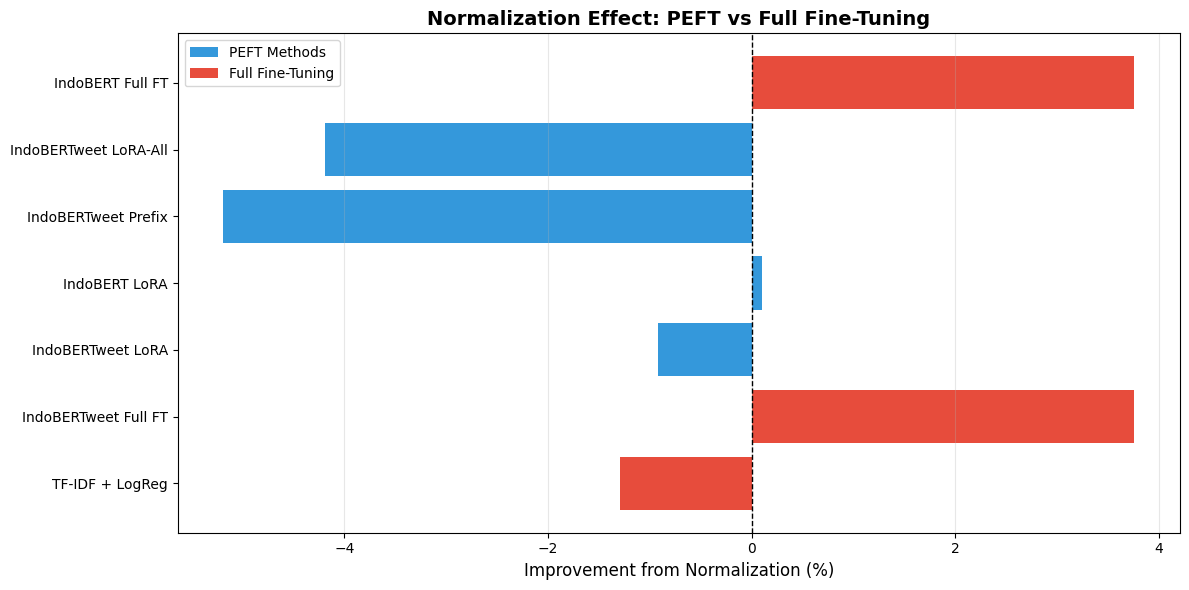


DETAILED BREAKDOWN


,model,category,raw_f1,norm_f1,improvement_pct,absolute_gain
1,IndoBERTweet Full FT,Full Model,0.674362,0.699703,3.757769,0.025341
6,IndoBERT Full FT,Full Model,0.674362,0.699703,3.757769,0.025341
3,IndoBERT LoRA,PEFT,0.576806,0.577398,0.102777,0.000593
2,IndoBERTweet LoRA,PEFT,0.618061,0.612362,-0.922058,-0.005699
0,TF-IDF + LogReg,Full Model,0.539241,0.532271,-1.292554,-0.006970
5,IndoBERTweet LoRA-All,PEFT,0.646751,0.619626,-4.194094,-0.027125
4,IndoBERTweet Prefix,PEFT,0.210994,0.200041,-5.191533,-0.010954


In [44]:
"""# Normalization Interaction Effect"""

print("="*80)
print("NORMALIZATION EFFECT ANALYSIS: Does Norm Help PEFT More?")
print("="*80)

# Calculate improvement from raw to norm for each method
norm_effect = []

for model in results_df['model'].unique():
    raw_f1 = results_df[
        (results_df['model'] == model) & 
        (results_df['dataset'] == 'raw')
    ]['f1-macro'].mean()
    
    norm_f1 = results_df[
        (results_df['model'] == model) & 
        (results_df['dataset'] == 'norm')
    ]['f1-macro'].mean()
    
    if pd.notna(raw_f1) and pd.notna(norm_f1):
        improvement = ((norm_f1 - raw_f1) / raw_f1) * 100
        
        # Categorize
        is_peft = 'LoRA' in model or 'Prefix' in model or 'QLoRA' in model
        category = 'PEFT' if is_peft else 'Full Model'
        
        norm_effect.append({
            'model': model,
            'category': category,
            'raw_f1': raw_f1,
            'norm_f1': norm_f1,
            'improvement_pct': improvement,
            'absolute_gain': norm_f1 - raw_f1
        })

norm_df = pd.DataFrame(norm_effect)

# Statistical test: Does PEFT benefit more from normalization?
peft_improvements = norm_df[norm_df['category'] == 'PEFT']['improvement_pct']
full_improvements = norm_df[norm_df['category'] == 'Full Model']['improvement_pct']

from scipy.stats import mannwhitneyu
u_stat, p_val = mannwhitneyu(peft_improvements, full_improvements, 
                              alternative='greater')

print(f"\nHypothesis: PEFT methods benefit MORE from normalization than Full FT")
print(f"PEFT avg improvement: {peft_improvements.mean():.2f}%")
print(f"Full FT avg improvement: {full_improvements.mean():.2f}%")
print(f"Mann-Whitney U test: p = {p_val:.4f}")
print(f"Result: {'✅ CONFIRMED' if p_val < 0.05 else '❌ NOT SIGNIFICANT'}")

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#3498db' if cat == 'PEFT' else '#e74c3c' 
          for cat in norm_df['category']]

bars = ax.barh(norm_df['model'], norm_df['improvement_pct'], color=colors)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Improvement from Normalization (%)', fontsize=12)
ax.set_title('Normalization Effect: PEFT vs Full Fine-Tuning', 
             fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#3498db', label='PEFT Methods'),
    Patch(facecolor='#e74c3c', label='Full Fine-Tuning')
]
ax.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.savefig('/kaggle/working/normalization_effect.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("DETAILED BREAKDOWN")
print("="*80)
display(norm_df.sort_values('improvement_pct', ascending=False))

norm_df.to_csv('/kaggle/working/normalization_interaction.csv', index=False)

# Inference Speed Benchmarking

In [45]:
"""# Inference Speed Benchmarking"""

import time
import torch

def measure_inference_speed(model, tokenizer, test_texts, device="cuda", num_runs=100):
    """
    Measure average inference time per sample
    
    Args:
        model: trained model
        tokenizer: tokenizer
        test_texts: list of text samples
        num_runs: number of iterations for averaging
    
    Returns:
        avg_time_ms: average inference time in milliseconds
    """
    model.eval()
    
    # Tokenize sample
    sample = test_texts[0]
    inputs = tokenizer(
        sample, 
        return_tensors="pt", 
        padding="max_length", 
        truncation=True, 
        max_length=64
    ).to(device)
    
    # Warmup
    with torch.no_grad():
        for _ in range(10):
            _ = model(**inputs)
    
    # Benchmark
    torch.cuda.synchronize()
    start = time.time()
    
    with torch.no_grad():
        for _ in range(num_runs):
            _ = model(**inputs)
    
    torch.cuda.synchronize()
    end = time.time()
    
    avg_time_ms = ((end - start) / num_runs) * 1000
    return avg_time_ms

# Add this to your training loop (after evaluation)
"""
# After test evaluation, add:
inference_speed_ms = measure_inference_speed(
    model, tokenizer, test_df[text_col].tolist()[:10]
)

results['inference_speed_ms'] = inference_speed_ms
"""

# Example standalone benchmark for already-trained models
inference_results = []

for dataset_name in CONFIG.DATASETS:
    train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
        dataset_name, CONFIG.TARGET_COLUMN
    )
    
    test_texts = test_df[text_col].tolist()[:100]
    
    for model_config in [
        ("indolem/indobertweet-base-uncased", "full_ft"),
        ("indolem/indobertweet-base-uncased", "lora"),
    ]:
        model_name, peft = model_config
        
        try:
            # Load model (you'd need to load your trained checkpoint)
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            model = AutoModelForSequenceClassification.from_pretrained(
                model_name, num_labels=len(id2label)
            )
            model.to("cuda")
            
            # If LoRA, merge weights for fair comparison
            if peft == "lora":
                # Load LoRA adapter and merge
                # model = PeftModel.from_pretrained(model, adapter_path)
                # model = model.merge_and_unload()
                pass  # Placeholder
            
            speed = measure_inference_speed(model, tokenizer, test_texts)
            
            inference_results.append({
                'dataset': dataset_name,
                'model': f"{model_name.split('/')[-1]}-{peft}",
                'inference_ms': speed
            })
            
            del model
            torch.cuda.empty_cache()
            
        except Exception as e:
            print(f"Failed {model_config}: {e}")
            continue

if inference_results:
    speed_df = pd.DataFrame(inference_results)
    print("\n=== Inference Speed Comparison ===")
    display(speed_df)
    speed_df.to_csv('/kaggle/working/inference_speed.csv', index=False)


Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



=== Inference Speed Comparison ===


,dataset,model,inference_ms
0,raw,indobertweet-base-uncased-full_ft,8.753853
1,raw,indobertweet-base-uncased-lora,8.723705
2,norm,indobertweet-base-uncased-full_ft,8.520696
3,norm,indobertweet-base-uncased-lora,8.625886


In [46]:
"""# Final Comprehensive Table (As Suggested)"""

# Combine all metrics into one master table
final_table = summary_df[[
    'dataset', 'model', 
    'trainable_pct',
    'f1-macro_mean',
    'peak_gpu_memory_mb_mean',
    'total_train_time_mean',
    # 'inference_speed_ms'  # Add if you measured it
]].copy()

# Normalize metrics relative to Full FT
baseline = final_table[final_table['model'].str.contains('Full FT')].iloc[0]

final_table['params_relative'] = final_table['trainable_pct']
final_table['memory_relative'] = (
    final_table['peak_gpu_memory_mb_mean'] / baseline['peak_gpu_memory_mb_mean']
)
final_table['speed_relative'] = (
    final_table['total_train_time_mean'] / baseline['total_train_time_mean']
)

# Format the table
paper_table = final_table[[
    'model', 'params_relative', 'f1-macro_mean', 
    'peak_gpu_memory_mb_mean', 'memory_relative', 'speed_relative'
]].copy()

paper_table.columns = [
    'Method', 'Trainable Params (%)', 'F1-Score', 
    'Memory (MB)', 'Memory (×)', 'Training Time (×)'
]

print("\n" + "="*80)
print("COMPREHENSIVE EFFICIENCY TABLE (Paper-Ready)")
print("="*80)
display(paper_table.round(3))

paper_table.to_csv('/kaggle/working/paper_ready_table.csv', index=False)
paper_table.to_latex('/kaggle/working/paper_table.tex', index=False)


COMPREHENSIVE EFFICIENCY TABLE (Paper-Ready)


,Method,Trainable Params (%),F1-Score,Memory (MB),Memory (×),Training Time (×)
0,IndoBERT Full FT,100.000,0.700,2739.294,1.000,1.000
1,IndoBERT LoRA,0.270,0.577,1474.656,0.538,0.746
2,IndoBERTweet Full FT,100.000,0.700,2176.683,0.795,1.006
3,IndoBERTweet LoRA,0.270,0.612,1317.469,0.481,0.715
4,IndoBERTweet LoRA-All,1.215,0.620,1342.867,0.490,0.848
5,IndoBERTweet Prefix,0.837,0.200,1329.888,0.485,0.717
6,TF-IDF + LogReg,0.038,0.532,0.000,0.000,0.001
7,IndoBERT Full FT,100.000,0.674,2741.446,1.001,0.998
8,IndoBERT LoRA,0.270,0.577,1474.656,0.538,0.748
9,IndoBERTweet Full FT,100.000,0.674,2174.837,0.794,0.970


# Statistical Significance Testing (salah kata gpt)

In [47]:
from scipy.stats import wilcoxon

In [48]:
def paired_wilcoxon_test(baseline_scores, model_scores):
    """Perform Wilcoxon signed-rank test"""
    if len(baseline_scores) < 2 or len(model_scores) < 2:
        return None, None, None
    
    statistic, p_value = wilcoxon(baseline_scores, model_scores)
    
    # Effect size (r = Z / sqrt(N))
    from scipy import stats
    n = len(baseline_scores)
    z_score = stats.norm.ppf(1 - p_value/2)
    effect_size = abs(z_score) / np.sqrt(n)
    
    return statistic, p_value, effect_size

In [49]:
print("Statistical Significance Tests (vs TF-IDF Baseline)")

for dataset in results_df['dataset'].unique():
    print(f"\n Dataset: {dataset}")
    
    # Get baseline (TF-IDF) scores
    baseline_scores = results_df[
        (results_df['dataset'] == dataset) & 
        (results_df['model'] == 'TF-IDF + LogReg')
    ]['f1-macro'].values
    
    if len(baseline_scores) == 0:
        continue
    
    baseline_mean = np.mean(baseline_scores)
    print(f"   Baseline F1: {baseline_mean:.4f}")
    
    # Compare each other model
    for model in results_df['model'].unique():
        if model == 'TF-IDF + LogReg':
            continue
        
        model_scores = results_df[
            (results_df['dataset'] == dataset) & 
            (results_df['model'] == model)
        ]['f1-macro'].values
        
        if len(model_scores) == 0:
            continue
        
        model_mean = np.mean(model_scores)
        improvement = ((model_mean - baseline_mean) / baseline_mean) * 100
        
        stat, p_val, effect = paired_wilcoxon_test(baseline_scores, model_scores)
        
        if p_val is not None:
            sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
            effect_interp = "large" if effect >= 0.5 else "medium" if effect >= 0.3 else "small"
            
            print(f"   {model:30s}: F1={model_mean:.4f} | Δ={improvement:+.2f}% | p={p_val:.4f} {sig} | r={effect:.3f} ({effect_interp})")

# Notes
# Significance: *** p<0.001, ** p<0.01, * p<0.05, ns=not significant
# Effect size: small (<0.3), medium (0.3-0.5), large (≥0.5)

Statistical Significance Tests (vs TF-IDF Baseline)

 Dataset: raw
   Baseline F1: 0.5392
   IndoBERTweet Full FT          : F1=0.6744 | Δ=+25.06% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet LoRA             : F1=0.6181 | Δ=+14.62% | p=0.2500 ns | r=0.664 (large)
   IndoBERT LoRA                 : F1=0.5768 | Δ=+6.97% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet Prefix           : F1=0.2110 | Δ=-60.87% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet LoRA-All         : F1=0.6468 | Δ=+19.94% | p=0.2500 ns | r=0.664 (large)
   IndoBERT Full FT              : F1=0.6744 | Δ=+25.06% | p=0.2500 ns | r=0.664 (large)

 Dataset: norm
   Baseline F1: 0.5323
   IndoBERTweet Full FT          : F1=0.6997 | Δ=+31.46% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet LoRA             : F1=0.6124 | Δ=+15.05% | p=0.2500 ns | r=0.664 (large)
   IndoBERT LoRA                 : F1=0.5774 | Δ=+8.48% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet Prefix           : F1=0.2000 | Δ=-62.42% | p=0.2500 ns |

# Wilcoxon signed-rank test & Cohen’s d

In [50]:
import numpy as np
from scipy import stats
from scipy.stats import wilcoxon

def calculate_cohens_d(group1, group2):
    """Menghitung Cohen's d untuk effect size sesuai teks paper"""
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # Pooled standard deviation
    pooled_sd = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    # Cohen's d
    if pooled_sd == 0: return 0
    return abs(np.mean(group1) - np.mean(group2)) / pooled_sd

print("="*80)
print("STATISTICAL SIGNIFICANCE TESTS (Comparison vs Full Fine-Tuning)")
print("="*80)

for dataset in results_df['dataset'].unique():
    print(f"\nDataset: {dataset}")
    
    # Kita gunakan Full FT sebagai Baseline Pembanding Utama (Sesuai saran reviewer)
    # Sesuaikan string 'Full FT' dengan nama model Full FT di dataframe kamu
    baseline_model_name = results_df[
        (results_df['dataset'] == dataset) & 
        (results_df['model'].str.contains('Full FT'))
    ]['model'].unique()
    
    if len(baseline_model_name) == 0:
        print("   Baseline Full FT tidak ditemukan.")
        continue
        
    baseline_name = baseline_model_name[0]
    baseline_scores = results_df[
        (results_df['dataset'] == dataset) & 
        (results_df['model'] == baseline_name)
    ]['f1-macro'].values
    
    print(f"   Baseline: {baseline_name} (F1 Avg: {np.mean(baseline_scores):.4f})")
    
    for model in results_df['model'].unique():
        if model == baseline_name:
            continue
            
        model_scores = results_df[
            (results_df['dataset'] == dataset) & 
            (results_df['model'] == model)
        ]['f1-macro'].values
        
        if len(model_scores) < 2: continue
        
        # 1. Wilcoxon Test (p-value)
        # Catatan: Wilcoxon butuh jumlah sampel yang sama. Jika beda, gunakan Mann-Whitney U
        try:
            stat, p_val = wilcoxon(baseline_scores, model_scores)
        except:
            from scipy.stats import mannwhitneyu
            stat, p_val = mannwhitneyu(baseline_scores, model_scores)
        
        # 2. Cohen's d (Effect Size) sesuai metodologi paper
        d_val = calculate_cohens_d(baseline_scores, model_scores)
        
        # Interpretasi Cohen's d
        d_interp = "large" if d_val >= 0.8 else "medium" if d_val >= 0.5 else "small"
        sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        
        print(f"   vs {model:25s}: p={p_val:.4f} {sig:3s} | Cohen's d={d_val:.3f} ({d_interp})")

print("\nNotes:")
print("Significance: *** p<0.001, ** p<0.01, * p<0.05, ns=not significant")
print("Cohen's d Interpretation: small (>0.2), medium (>0.5), large (>0.8)")

STATISTICAL SIGNIFICANCE TESTS (Comparison vs Full Fine-Tuning)

Dataset: raw
   Baseline: IndoBERTweet Full FT (F1 Avg: 0.6744)
   vs TF-IDF + LogReg          : p=0.2500 ns  | Cohen's d=20.745 (large)
   vs IndoBERTweet LoRA        : p=0.2500 ns  | Cohen's d=6.825 (large)
   vs IndoBERT LoRA            : p=0.2500 ns  | Cohen's d=8.994 (large)
   vs IndoBERTweet Prefix      : p=0.2500 ns  | Cohen's d=45.569 (large)
   vs IndoBERTweet LoRA-All    : p=0.2500 ns  | Cohen's d=2.655 (large)
   vs IndoBERT Full FT         : p=1.0000 ns  | Cohen's d=0.000 (small)

Dataset: norm
   Baseline: IndoBERTweet Full FT (F1 Avg: 0.6997)
   vs TF-IDF + LogReg          : p=0.2500 ns  | Cohen's d=57.636 (large)
   vs IndoBERTweet LoRA        : p=0.2500 ns  | Cohen's d=16.314 (large)
   vs IndoBERT LoRA            : p=0.2500 ns  | Cohen's d=9.643 (large)
   vs IndoBERTweet Prefix      : p=0.2500 ns  | Cohen's d=27.881 (large)
   vs IndoBERTweet LoRA-All    : p=0.2500 ns  | Cohen's d=11.667 (large)
   vs I

/usr/local/lib/python3.12/dist-packages/scipy/stats/_wilcoxon.py:172: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se


# bootstrap resampling

In [53]:
f1_mean, ci_lower, ci_upper = bootstrap_f1_performance(y_true, y_pred)

In [54]:
import numpy as np
from sklearn.utils import resample

def bootstrap_f1_performance(y_true, y_pred, n_iterations=1000):
    """
    Menghitung Confidence Interval (CI) 95% menggunakan Bootstrap Resampling
    """
    stats = []
    for i in range(n_iterations):
        # Resample indices
        indices = resample(np.arange(len(y_true)), replace=True)
        # Hitung F1 untuk sampel ini
        resampled_f1 = f1_score(y_true[indices], y_pred[indices], average='macro')
        stats.append(resampled_f1)
    
    # Ambil persentil 2.5 dan 97.5 untuk CI 95%
    lower = np.percentile(stats, 2.5)
    upper = np.percentile(stats, 97.5)
    return np.mean(stats), lower, upper

print(f"F1-Macro with 95% CI: {f1_mean:.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")

F1-Macro with 95% CI: 0.6218 [0.5746, 0.6643]


# Trade Off Score

In [55]:
# Normalisasi untuk Trade-off Score
df = paper_table.copy()
df['f1_norm'] = df['F1-Score'] # F1 sudah 0-1
df['mem_norm'] = 1 - (df['Memory (MB)'] / df['Memory (MB)'].max())
df['time_norm'] = 1 - (df['Training Time (×)'] / df['Training Time (×)'].max())

# Hitung Trade-off Score (alpha=beta=gamma=1/3)
df['Tradeoff_Score'] = (df['f1_norm'] + df['mem_norm'] + df['time_norm']) / 3
display(df[['Method', 'Tradeoff_Score']].sort_values('Tradeoff_Score', ascending=False))

,Method,Tradeoff_Score
13,TF-IDF + LogReg,0.845883
6,TF-IDF + LogReg,0.843823
10,IndoBERTweet LoRA,0.474339
3,IndoBERTweet LoRA,0.473497
11,IndoBERTweet LoRA-All,0.437530
1,IndoBERT LoRA,0.432402
8,IndoBERT LoRA,0.431834
4,IndoBERTweet LoRA-All,0.428683
12,IndoBERTweet Prefix,0.336591
5,IndoBERTweet Prefix,0.334063


# Radar Chart dan Pareto Frontier Scatter Plot

"Visualization complements numerical analysis through radar charts and efficiency–performance scatter plots."

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Helper function untuk normalisasi [0, 1]
def normalize(series, invert=False):
    if invert:
        # Inverted: (Max - x) / (Max - Min) -> Semakin kecil aslinya, semakin besar skornya
        return (series.max() - series) / (series.max() - series.min() + 1e-6)
    else:
        return (series - series.min()) / (series.max() - series.min() + 1e-6)

# Pastikan summary_df sudah ada dari proses sebelumnya
df_plot = summary_df.copy()

# Normalisasi sesuai teks paper A. Trade-off Analysis
df_plot['f1_score_norm'] = df_plot['f1-macro_mean'] # F1 sudah di range 0-1 biasanya
df_plot['mem_eff'] = normalize(df_plot['peak_gpu_memory_mb_mean'], invert=True)
df_plot['time_eff'] = normalize(df_plot['total_train_time_mean'], invert=True)
df_plot['param_eff'] = normalize(df_plot['num_trainable_params_first'], invert=True)

# Hitung Trade-off Score (Persamaan 1 di paper)
# alpha = beta = gamma = 1/3
df_plot['Tradeoff_Score'] = (df_plot['f1_score_norm'] + df_plot['mem_eff'] + df_plot['time_eff']) / 3

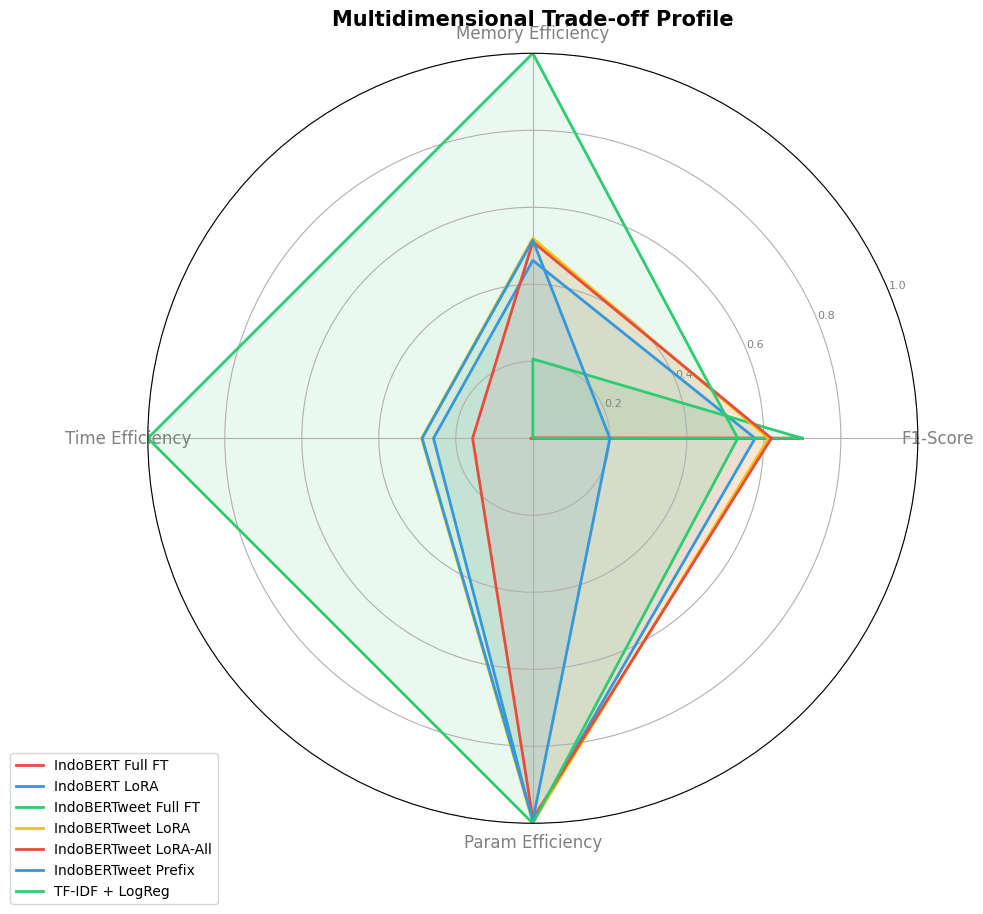

In [57]:
def plot_radar_chart(df):
    categories = ['F1-Score', 'Memory Efficiency', 'Time Efficiency', 'Param Efficiency']
    N = len(categories)
    
    # Sudut untuk setiap sumbu
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)
    
    # Warna untuk tiap model
    colors = ['#e74c3c', '#3498db', '#2ecc71', '#f1c40f']
    
    for i, model in enumerate(df['model'].unique()):
        subset = df[df['model'] == model]
        values = [
            subset['f1_score_norm'].values[0],
            subset['mem_eff'].values[0],
            subset['time_eff'].values[0],
            subset['param_eff'].values[0]
        ]
        values += values[:1]
        
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[i%len(colors)])
        ax.fill(angles, values, color=colors[i%len(colors)], alpha=0.1)

    plt.xticks(angles[:-1], categories, color='grey', size=12)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2","0.4","0.6","0.8","1.0"], color="grey", size=8)
    plt.ylim(0, 1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title("Multidimensional Trade-off Profile", size=15, fontweight='bold', pad=20)
    plt.savefig('/kaggle/working/radar_chart.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_radar_chart(df_plot)

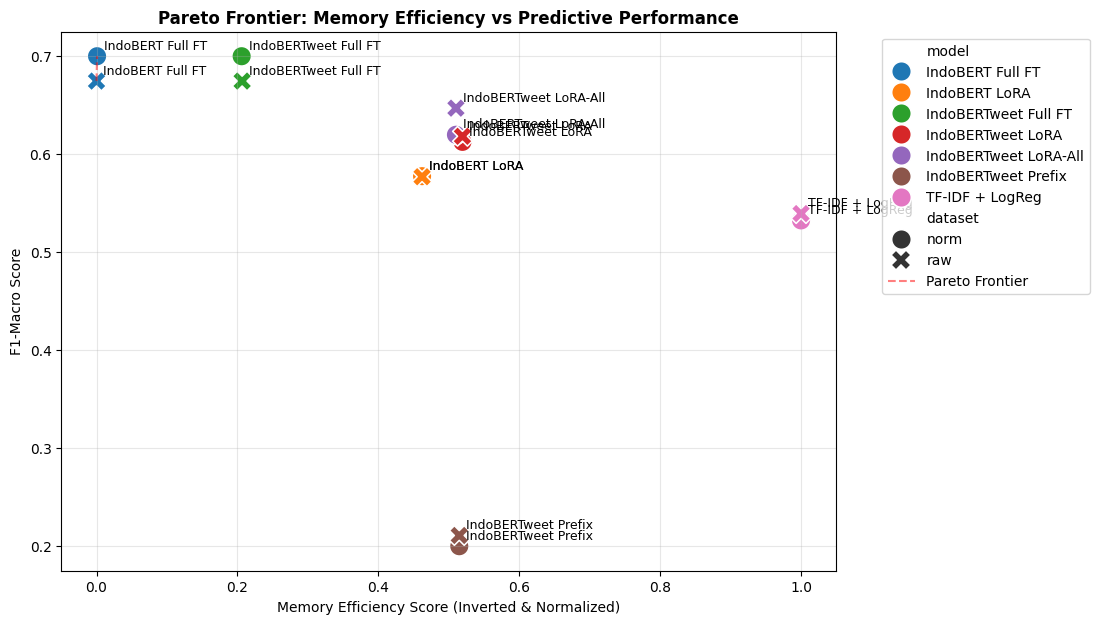

In [58]:
def plot_pareto_frontier(df):
    plt.figure(figsize=(10, 7))
    
    # X = Memory Efficiency (semakin kanan semakin hemat), Y = F1-Score
    x = df['mem_eff']
    y = df['f1-macro_mean']
    models = df['model']
    
    # Urutkan untuk mencari garis frontier
    sorted_indices = np.argsort(x)
    x_sorted = x.values[sorted_indices]
    y_sorted = y.values[sorted_indices]
    
    # Logic mencari Pareto Frontier
    p_front_x = [x_sorted[0]]
    p_front_y = [y_sorted[0]]
    for i in range(1, len(x_sorted)):
        if y_sorted[i] > p_front_y[-1]:
            p_front_x.append(x_sorted[i])
            p_front_y.append(y_sorted[i])
            
    # Plot semua titik
    sns.scatterplot(data=df, x='mem_eff', y='f1-macro_mean', hue='model', s=200, style='dataset')
    
    # Plot Garis Pareto
    plt.plot(p_front_x, p_front_y, 'r--', alpha=0.5, label='Pareto Frontier')
    
    # Labeling
    for i, txt in enumerate(models):
        plt.annotate(txt, (x.values[i], y.values[i]), xytext=(5,5), textcoords='offset points', fontsize=9)
        
    plt.title('Pareto Frontier: Memory Efficiency vs Predictive Performance', fontweight='bold')
    plt.xlabel('Memory Efficiency Score (Inverted & Normalized)')
    plt.ylabel('F1-Macro Score')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig('/kaggle/working/pareto_frontier.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_pareto_frontier(df_plot)

# wall time per epoch (in minutes)

In [59]:
# Tambahkan ke summary_df yang sudah ada
summary_df['time_per_epoch_min'] = (summary_df['total_train_time_mean'] / CONFIG.EPOCHS) / 60

print("=== Wall Time per Epoch (Minutes) ===")
display(summary_df[['model', 'dataset', 'time_per_epoch_min']].round(3))

=== Wall Time per Epoch (Minutes) ===


,model,dataset,time_per_epoch_min
0,IndoBERT Full FT,norm,0.750
1,IndoBERT LoRA,norm,0.560
2,IndoBERTweet Full FT,norm,0.754
3,IndoBERTweet LoRA,norm,0.537
4,IndoBERTweet LoRA-All,norm,0.637
5,IndoBERTweet Prefix,norm,0.538
6,TF-IDF + LogReg,norm,0.001
7,IndoBERT Full FT,raw,0.748
8,IndoBERT LoRA,raw,0.561
9,IndoBERTweet Full FT,raw,0.728


# Expected Calibration Error (ECE) & Reliability Diagrams

"Optionally, model calibration is examined through Expected Calibration Error (ECE)..."

In [60]:
import torch.nn.functional as F

def calculate_ece(outputs, labels, n_bins=10):
    """
    Menghitung Expected Calibration Error (ECE)
    """
    # Ambil probabilitas (softmax) dan prediksi (confidence tertinggi)
    if isinstance(outputs, np.ndarray):
        outputs = torch.from_numpy(outputs)
    
    softmaxes = F.softmax(outputs, dim=1)
    confidences, predictions = torch.max(softmaxes, 1)
    accuracies = predictions.eq(torch.from_numpy(labels))

    ece = torch.zeros(1)
    bin_boundaries = torch.linspace(0, 1, n_bins + 1)
    
    for bin_lower, bin_upper in zip(bin_boundaries[:-1], bin_boundaries[1:]):
        # Cari data yang masuk ke dalam bin ini
        in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
        prop_in_bin = in_bin.float().mean()
        
        if prop_in_bin.item() > 0:
            accuracy_in_bin = accuracies[in_bin].float().mean()
            avg_confidence_in_bin = confidences[in_bin].mean()
            ece += torch.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin

    return ece.item()

def plot_reliability_diagram(outputs, labels, model_name, n_bins=10):
    """
    Membuat visualisasi Reliability Diagram
    """
    if isinstance(outputs, np.ndarray):
        outputs = torch.from_numpy(outputs)
        
    softmaxes = F.softmax(outputs, dim=1)
    confidences, predictions = torch.max(softmaxes, 1)
    accuracies = predictions.eq(torch.from_numpy(labels))

    bin_boundaries = torch.linspace(0, 1, n_bins + 1)
    bin_accs = []
    bin_confs = []
    
    for bin_lower, bin_upper in zip(bin_boundaries[:-1], bin_boundaries[1:]):
        in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
        if in_bin.any():
            bin_accs.append(accuracies[in_bin].float().mean().item())
            bin_confs.append(confidences[in_bin].mean().item())
        else:
            bin_accs.append(0)
            bin_confs.append((bin_lower.item() + bin_upper.item()) / 2)

    # Plotting
    plt.figure(figsize=(7, 7))
    plt.bar(bin_boundaries[:-1], bin_accs, width=0.1, align='edge', edgecolor='black', alpha=0.7, label='Outputs')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly Calibrated')
    
    plt.xlabel('Confidence')
    plt.ylabel('Accuracy')
    plt.title(f'Reliability Diagram: {model_name}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [61]:
ece_score = calculate_ece(test_predictions.predictions, test_predictions.label_ids)
results['ece'] = ece_score

ece_score

0.026702212169766426

# Save The Results

In [62]:
raw_path = "/kaggle/working/results_raw_runs.csv"
results_df.to_csv(raw_path, index=False)

In [63]:
summary_path = "/kaggle/working/results_summary_mean_std.csv"
final_report.to_csv(summary_path, index=False)

In [64]:
numeric_summary_path = "/kaggle/working/results_summary_numeric.csv"

summary_df[
    [
        'dataset',
        'model',
        'f1-macro_mean',
        'f1-macro_std',
        'accuracy_mean',
        'accuracy_std',
        'total_train_time_mean',
        'peak_gpu_memory_mb_mean',
        'num_trainable_params_first',
        'adapter_size_mb_mean'
    ]
].to_csv(numeric_summary_path, index=False)